<a href="https://www.kaggle.com/code/gallo33henrique/auto-insurance-claims-ml-rede-neural-perceptron?scriptVersionId=251129900" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Part 1 - Business Problem


### **Business Problem (in English)**

**Objective:**
The insurance company aims to identify fraudulent auto insurance claims based on customer information, policy details, incident characteristics, and claim amounts.

**Business Question:**
**Can we predict whether an auto insurance claim is fraudulent based on the available policyholder, vehicle, and incident data?**

**Context:**
Insurance fraud is a major financial threat in the auto insurance industry, leading to significant monetary losses every year. By analyzing historical claims data—including policy attributes, insured demographics, accident details, and claim amounts—the goal is to build a predictive model to flag potentially fraudulent claims at the time of filing. This will help the company reduce financial risk, prioritize investigations, and increase operational efficiency.

**Key Business Impact:**

* Reduce financial losses due to fraudulent claims
* Optimize investigation resources
* Speed up legitimate claim processing
* Improve customer trust and satisfaction

**Target Variable:**
`fraud_reported` (Yes/No)

In [109]:
import joblib
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Ensemble models from Scikit-learn
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
)

# TensorFlow / Keras neural network modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.utils import set_random_seed

# Gradient Boosting models: XGBoost and LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Metrics and evaluation tools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from IPython.display import display

# Part 2 - Database

In [110]:
df = pd.read_csv("/kaggle/input/auto-insurance-claims-data/insurance_claims.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [111]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [112]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [113]:
df.shape

(1000, 40)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [115]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Part 3 - Data Cleaning

In [116]:
# Check the total number of missing (null) values in each column
null_counts = df.isnull().sum()

# Filter only columns that contain at least one missing value
null_columns = null_counts[null_counts > 0]

# Print the columns with missing values
print("Columns with missing values:")
print(null_columns)

Columns with missing values:
authorities_contacted      91
_c39                     1000
dtype: int64


In [117]:
# Fill missing values in 'authorities_contacted' with a placeholder
df['authorities_contacted'].fillna('Unknown', inplace=True)

# Drop column '_c39' if it's not relevant
df.drop('_c39', axis=1, inplace=True)

/tmp/ipykernel_8520/1075481500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['authorities_contacted'].fillna('Unknown', inplace=True)


In [118]:
# Check the total number of missing (null) values in each column
null_counts = df.isnull().sum()

# Filter only columns that contain at least one missing value
null_columns = null_counts[null_counts > 0]

# Print the columns with missing values
print("Columns with missing values:")
print(null_columns)

Columns with missing values:
Series([], dtype: int64)


In [119]:
# Calculate the percentage of missing values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Print the percentage of missing values, sorted from highest to lowest
print("\nPercentage of missing values by column:")
print(null_percentage[null_percentage > 0].sort_values(ascending=False))


Percentage of missing values by column:
Series([], dtype: float64)


In [120]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the first few duplicate rows (if any)
if not duplicate_rows.empty:
    print("\nExample duplicate rows:")
    print(duplicate_rows.head())

Number of duplicate rows: 0


In [121]:
# Remove duplicate rows (keeping the first occurrence)
df.drop_duplicates(inplace=True)

# Confirm removal
print(f"New dataset shape after removing duplicates: {df.shape}")

New dataset shape after removing duplicates: (1000, 39)


In [122]:
# Example: Check for duplicates based on 'policy_number' and 'incident_date'
df.duplicated(subset=['policy_number', 'incident_date']).sum()

0

# Part 4 - Exploratory Data Analysis

1. **What are the key differences between fraudulent and non-fraudulent claims?**

Identificar padrões em variáveis como idade, tipo de incidente, valor da apólice e localização.

2. **Which customer demographics are more likely to file high-value claims?**

Analisar variáveis como `age`, `insured_education_level`, `insured_occupation` e `total_claim_amount`.

3. **Are certain types of incidents or collision types more frequently associated with fraud?**

Explorar a relação entre `incident_type`, `collision_type` e `fraud_reported`.

4. **Does the number of witnesses or police reports correlate with fraud detection?**

Verificar se `witnesses` e `police_report_available` são preditores de fraude.

5. **How does the time of the incident (hour of the day) impact the likelihood of a fraudulent claim?**

Investigar padrões temporais em `incident_hour_of_the_day`.

6. **Which cities or states have the highest concentration of fraudulent claims?**

Geolocalizar fraudes usando `incident_city` e `incident_state`.

7. **Is there a significant relationship between the customer’s policy details and fraud likelihood?**

Explorar `policy_deductable`, `policy_annual_premium`, `umbrella_limit`, `months_as_customer`.

8. **What is the average financial loss from fraudulent claims compared to legitimate ones?**

Comparar `total_claim_amount` entre os grupos de fraude e não-fraude.

9. **Do certain auto makes or models appear more frequently in fraudulent claims?**

Analisar se `auto_make` e `auto_model` têm alguma associação com fraude.

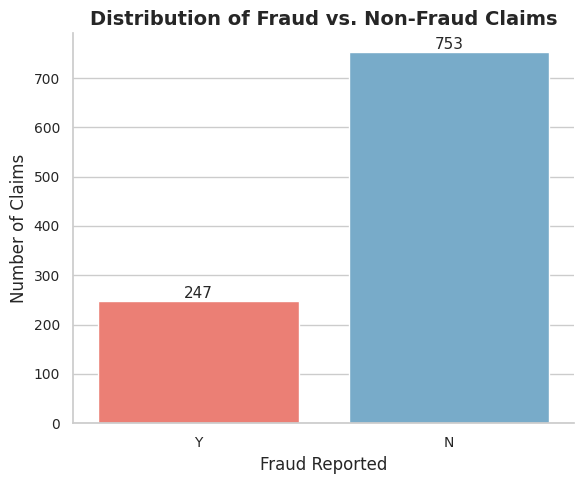

In [123]:
# Create the countplot
plt.figure(figsize=(6, 5))
ax = sns.countplot(
    x="fraud_reported",
    data=df,
    palette={"Y": "#FF6F61", "N": "#6BAED6"}
)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=11)

# Customize plot
plt.title("Distribution of Fraud vs. Non-Fraud Claims", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Reported", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

In [124]:
# Select only numeric columns (integers and floats)
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Print the list of numerical columns
print("Numeric columns selected for correlation analysis:")
print(num_cols.columns.tolist())

Numeric columns selected for correlation analysis:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


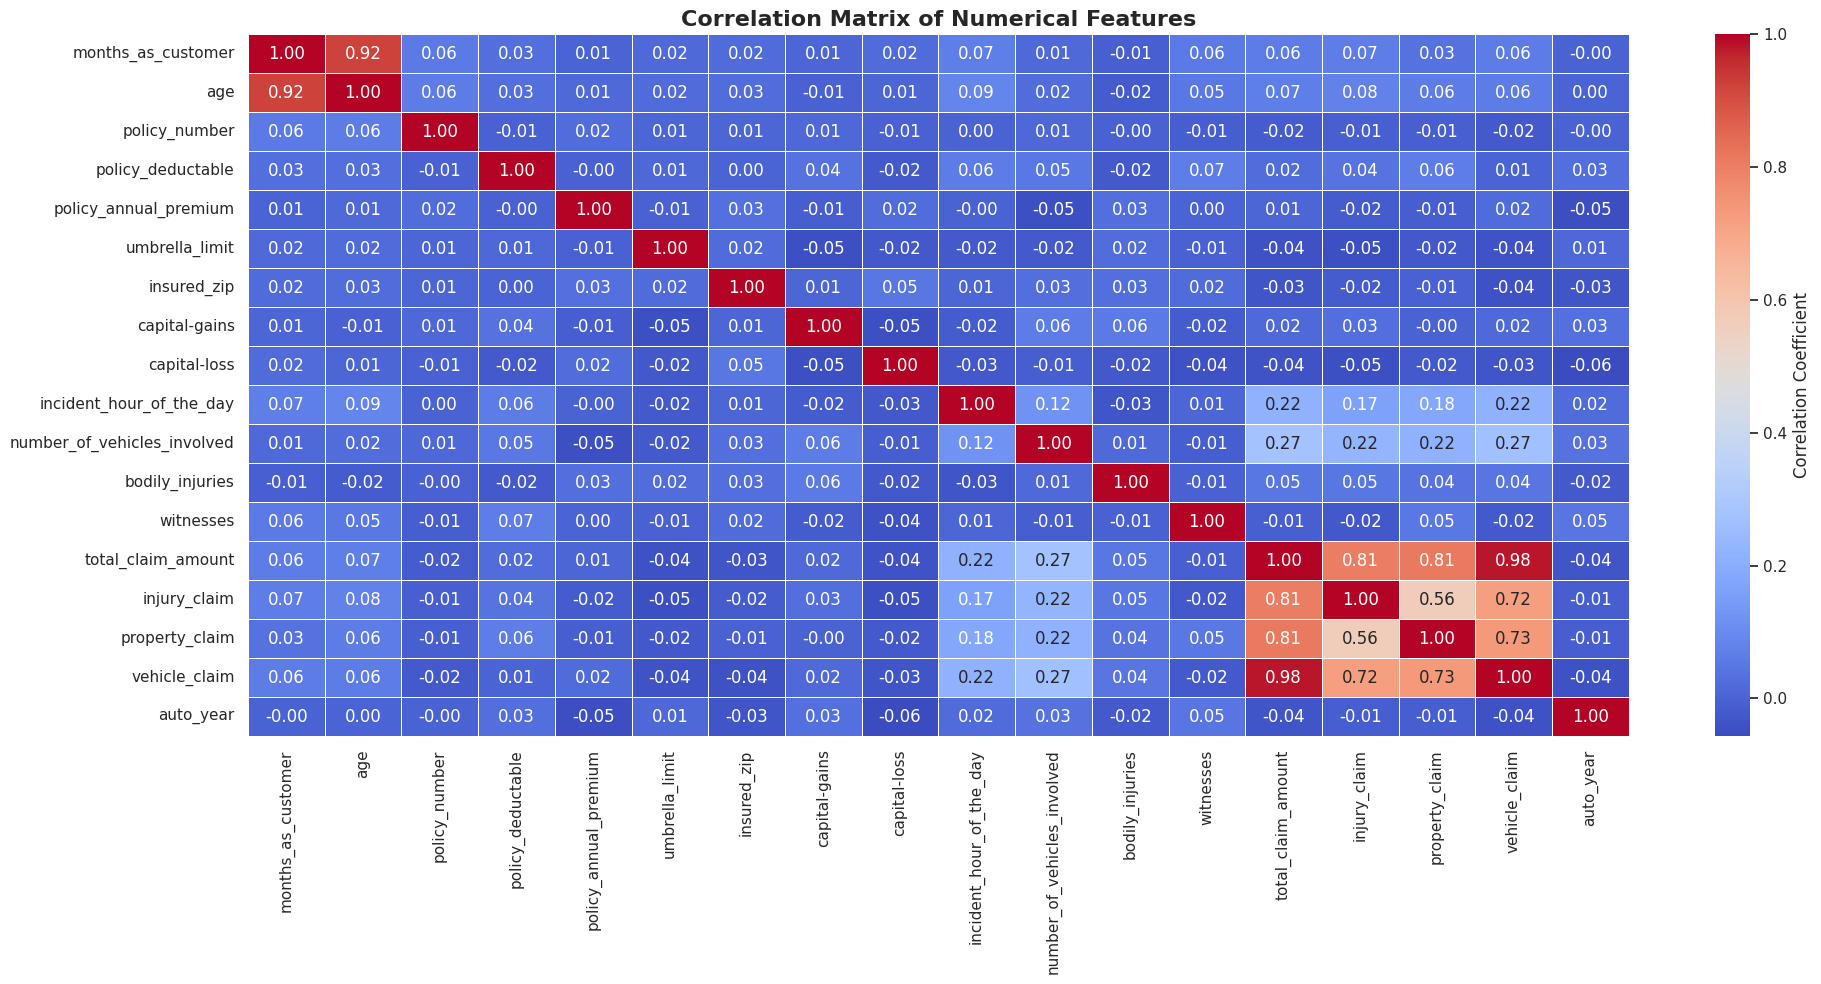


Correlation with fraud_reported (binary)
fraud_binary                   1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
auto_year                      0.007928
incident_hour_of_the_day       0.004316
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
policy_number                 -0.029443
Name: fraud_binary, dtype: float64


In [125]:
# Calculate Pearson correlation matrix
corr_matrix = num_cols.corr()

# Set visualization style
sns.set(style="white")

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",  # format decimal places
            cmap="coolwarm",
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Filter correlation matrix for strong correlations (> 0.7 or < -0.7)
strong_corr = corr_matrix[((corr_matrix > 0.7) | (corr_matrix < -0.7)) & (corr_matrix != 1.0)]

# Show non-empty values
#print("Strong correlations (|r| > 0.7):")
#print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))

# Convert fraud_reported to numeric (binary)
df['fraud_binary'] = df['fraud_reported'].map({'N': 0, 'Y': 1})

# Add to numeric set and recompute correlation matrix
num_cols_with_target = df[num_cols.columns.tolist() + ['fraud_binary']]
target_corr = num_cols_with_target.corr()['fraud_binary'].sort_values(ascending=False)

# Display correlation of features with fraud
print()
print("Correlation with fraud_reported (binary)")
print(target_corr)

These show very strong linear relationships between different types of claims and the total claim amount — which is expected, since total_claim_amount likely = injury + property + vehicle.

| Feature\_1           | Feature\_2           | Correlation |
| -------------------- | -------------------- | ----------- |
| vehicle\_claim       | total\_claim\_amount | 0.98        |
| injury\_claim        | total\_claim\_amount | 0.81        |
| property\_claim      | total\_claim\_amount | 0.81        |
| vehicle\_claim       | injury\_claim        | 0.73        |
| property\_claim      | vehicle\_claim       | 0.73        |
| property\_claim      | injury\_claim        | 0.56        |
| months\_as\_customer | age                  | 0.92        |

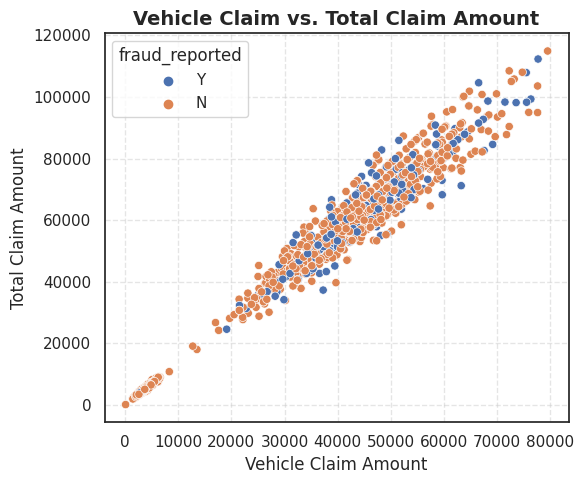

In [126]:
# Scatter plot: vehicle_claim vs total_claim_amount
plt.figure(figsize=(6, 5))
sns.scatterplot(x="vehicle_claim", y="total_claim_amount", hue="fraud_reported", data=df, color="#6BAED6")

plt.title("Vehicle Claim vs. Total Claim Amount", fontsize=14, fontweight='bold')
plt.xlabel("Vehicle Claim Amount", fontsize=12)
plt.ylabel("Total Claim Amount", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_8520/1507695751.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


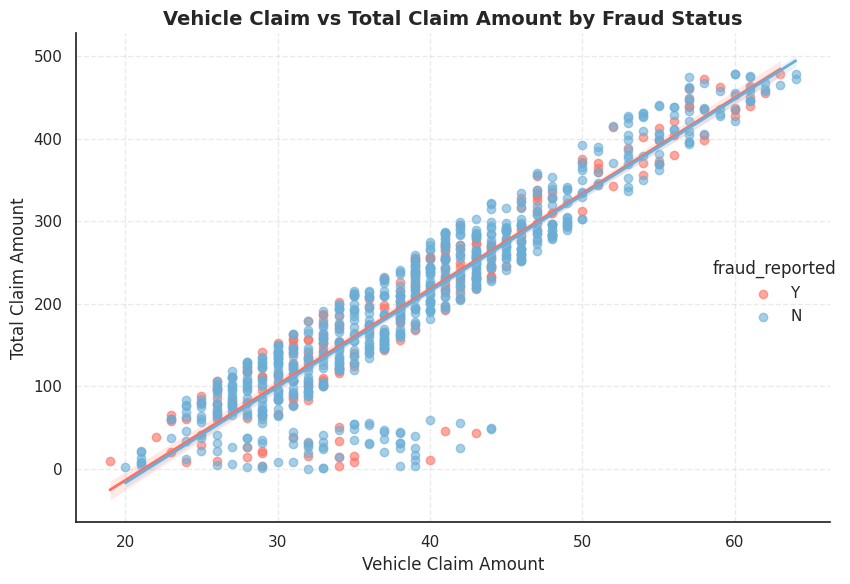

In [127]:
sns.lmplot(
    x="age",
    y="months_as_customer",
    hue="fraud_reported",
    data=df,
    palette={"Y": "#FF6F61", "N": "#6BAED6"},
    height=6,
    aspect=1.2,
    scatter_kws={"alpha": 0.6},
    line_kws={"linewidth": 2}
)

plt.title("Vehicle Claim vs Total Claim Amount by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Vehicle Claim Amount", fontsize=12)
plt.ylabel("Total Claim Amount", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_8520/1667437485.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


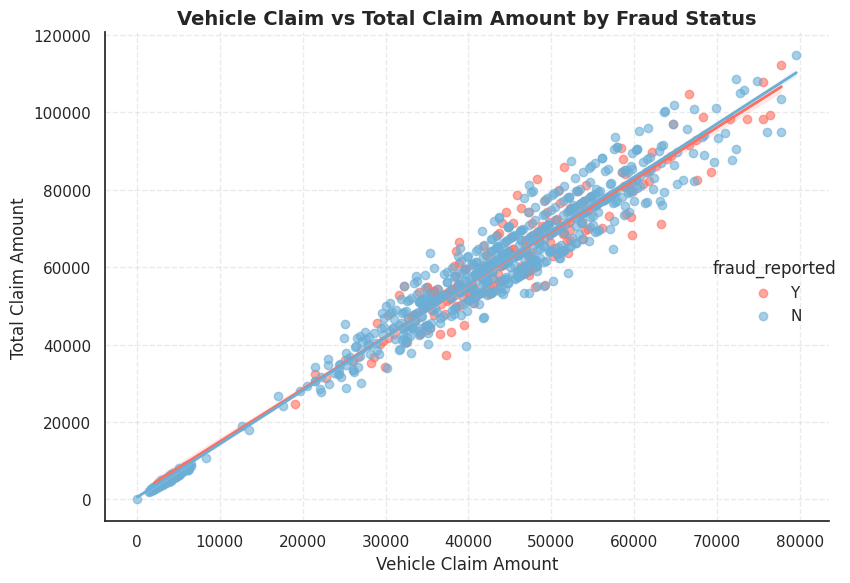

In [128]:
sns.lmplot(
    x="vehicle_claim",
    y="total_claim_amount",
    hue="fraud_reported",
    data=df,
    palette={"Y": "#FF6F61", "N": "#6BAED6"},
    height=6,
    aspect=1.2,
    scatter_kws={"alpha": 0.6},
    line_kws={"linewidth": 2}
)

plt.title("Vehicle Claim vs Total Claim Amount by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Vehicle Claim Amount", fontsize=12)
plt.ylabel("Total Claim Amount", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

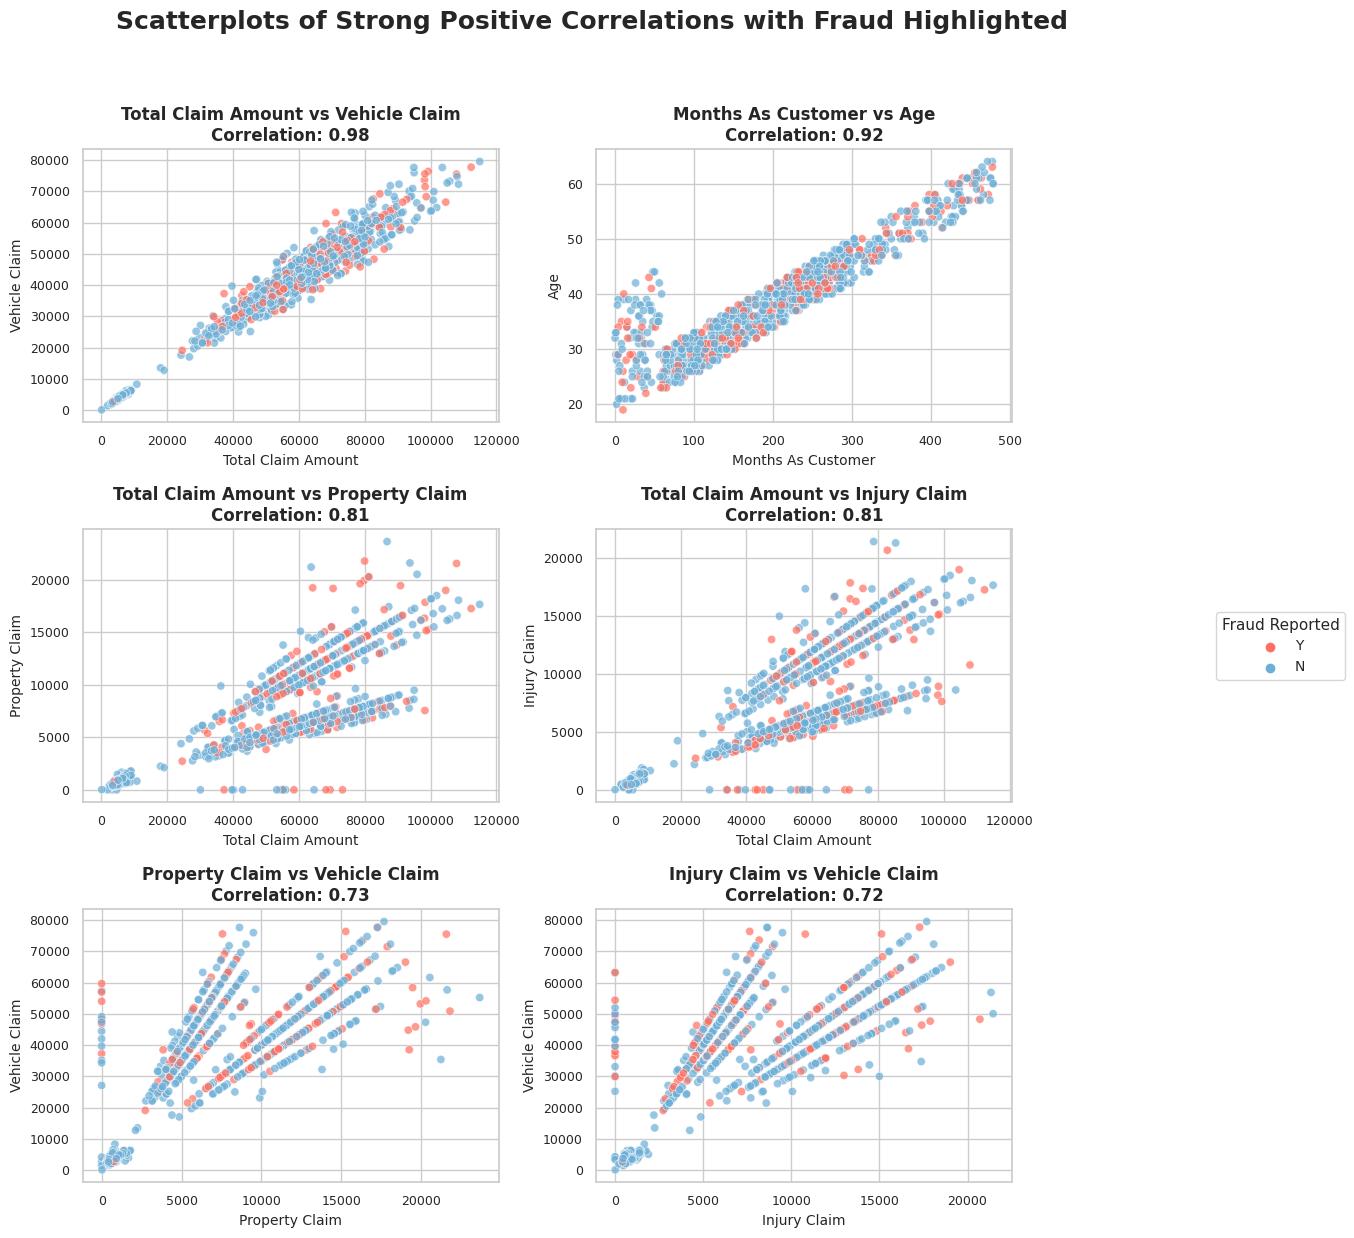

In [129]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = num_cols.corr()

# Unstack and filter strong positive correlations
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature_1'] != corr_pairs['Feature_2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])

positive_corr = corr_pairs[corr_pairs['Correlation'] > 0.6].sort_values(by='Correlation', ascending=False)

# Create subplots
n = len(positive_corr)
cols = 2
rows = (n + 1) // cols

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1)

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

# Plot scatterplots with hue
for i, row in enumerate(positive_corr.itertuples()):
    ax = axes[i]
    sns.scatterplot(
        data=df,
        x=row.Feature_1,
        y=row.Feature_2,
        hue="fraud_reported",
        palette={"Y": "#FF6F61", "N": "#6BAED6"},
        ax=ax,
        alpha=0.7
    )
    # Improve subplot title formatting
    title = f"{row.Feature_1.replace('_', ' ').title()} vs {row.Feature_2.replace('_', ' ').title()}"
    ax.set_title(f"{title}\nCorrelation: {row.Correlation:.2f}", fontsize=12, weight='bold')
    ax.set_xlabel(row.Feature_1.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel(row.Feature_2.replace('_', ' ').title(), fontsize=10)
    ax.tick_params(labelsize=9)
    ax.legend_.remove()  # Remove individual legends

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add single legend outside the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title='Fraud Reported',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.,
    fontsize=10,
    title_fontsize=11
)

# Final layout
plt.suptitle("Scatterplots of Strong Positive Correlations with Fraud Highlighted", fontsize=18, fontweight='bold', y=1.03)
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

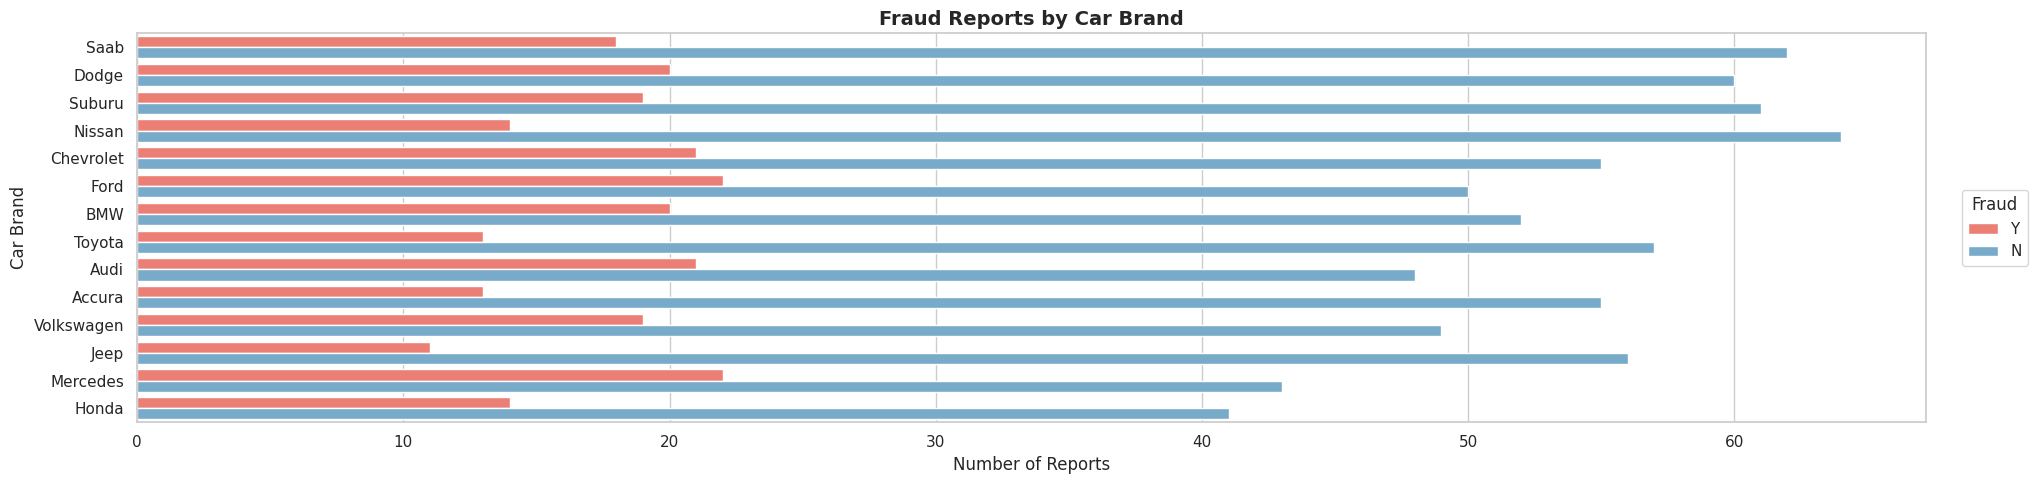

In [130]:
plt.figure(figsize=(20.5, 5))  # Set the figure size

# Create a countplot for car brands grouped by fraud status
sns.countplot(
    data=df,
    y='auto_make',
    hue='fraud_reported',
    order=df['auto_make'].value_counts().index,
    palette={"Y": "#FF6F61", "N": "#6BAED6"}  # Red for fraud, blue for no fraud
)

# Title and axis labels
plt.title("Fraud Reports by Car Brand", fontsize=14, fontweight='bold')
plt.xlabel("Number of Reports")
plt.ylabel("Car Brand")

# Place legend outside the plot to the right
plt.legend(
    title="Fraud",
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

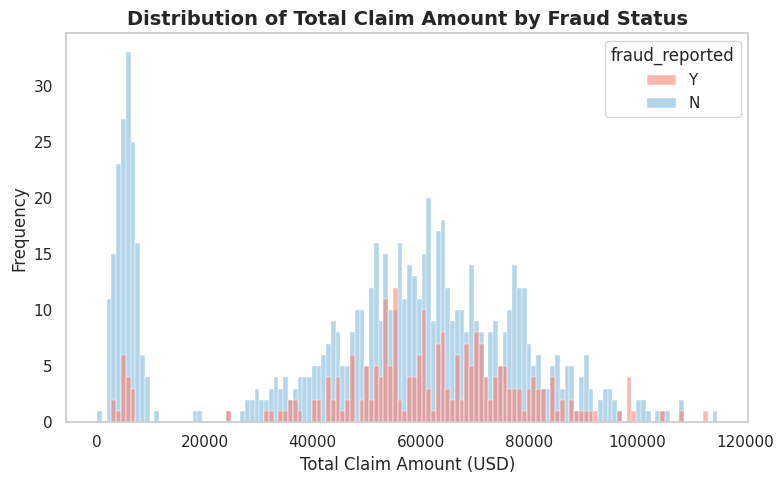

In [131]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='total_claim_amount', hue='fraud_reported', kde=False, bins=130, palette={"Y": "#FF6F61", "N": "#6BAED6"})
plt.title("Distribution of Total Claim Amount by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Total Claim Amount (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(False)
plt.show()

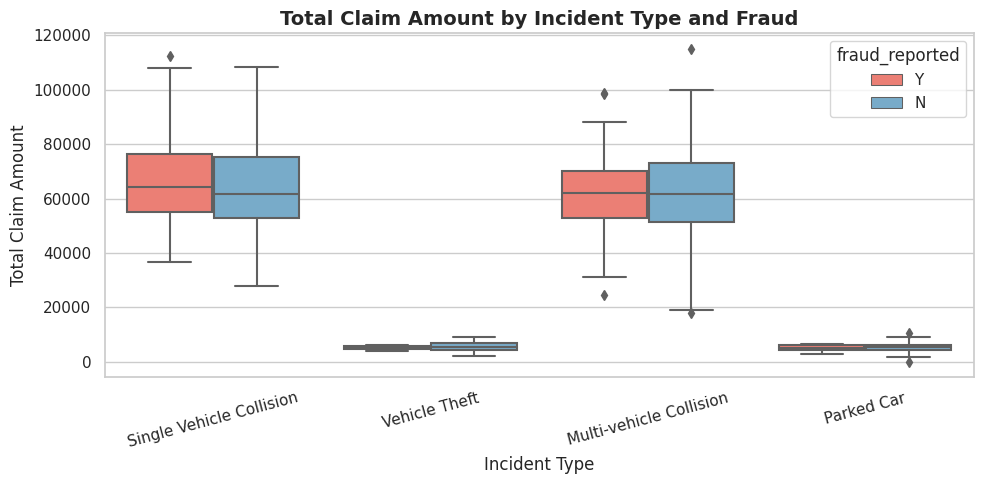

In [132]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='incident_type', y='total_claim_amount', hue='fraud_reported', palette={"Y": "#FF6F61", "N": "#6BAED6"})
plt.title("Total Claim Amount by Incident Type and Fraud", fontsize=14, fontweight='bold')
plt.xlabel("Incident Type")
plt.ylabel("Total Claim Amount")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

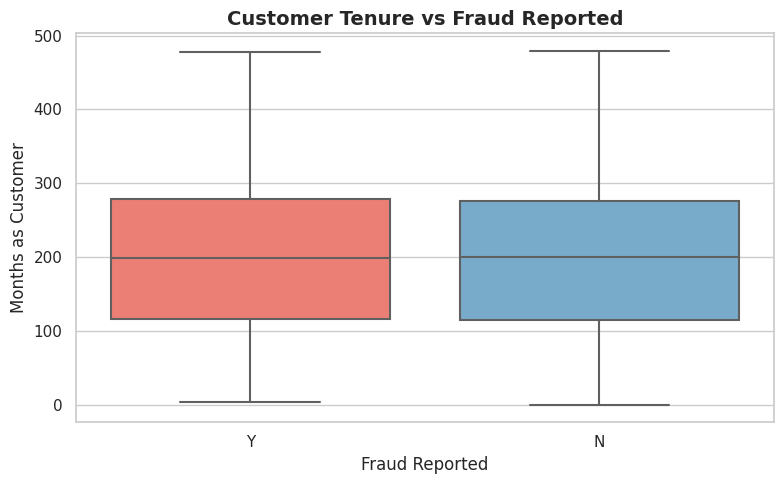

In [133]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='fraud_reported', y='months_as_customer', palette={"Y": "#FF6F61", "N": "#6BAED6"})
plt.title("Customer Tenure vs Fraud Reported", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Reported")
plt.ylabel("Months as Customer")
plt.tight_layout()
plt.show()

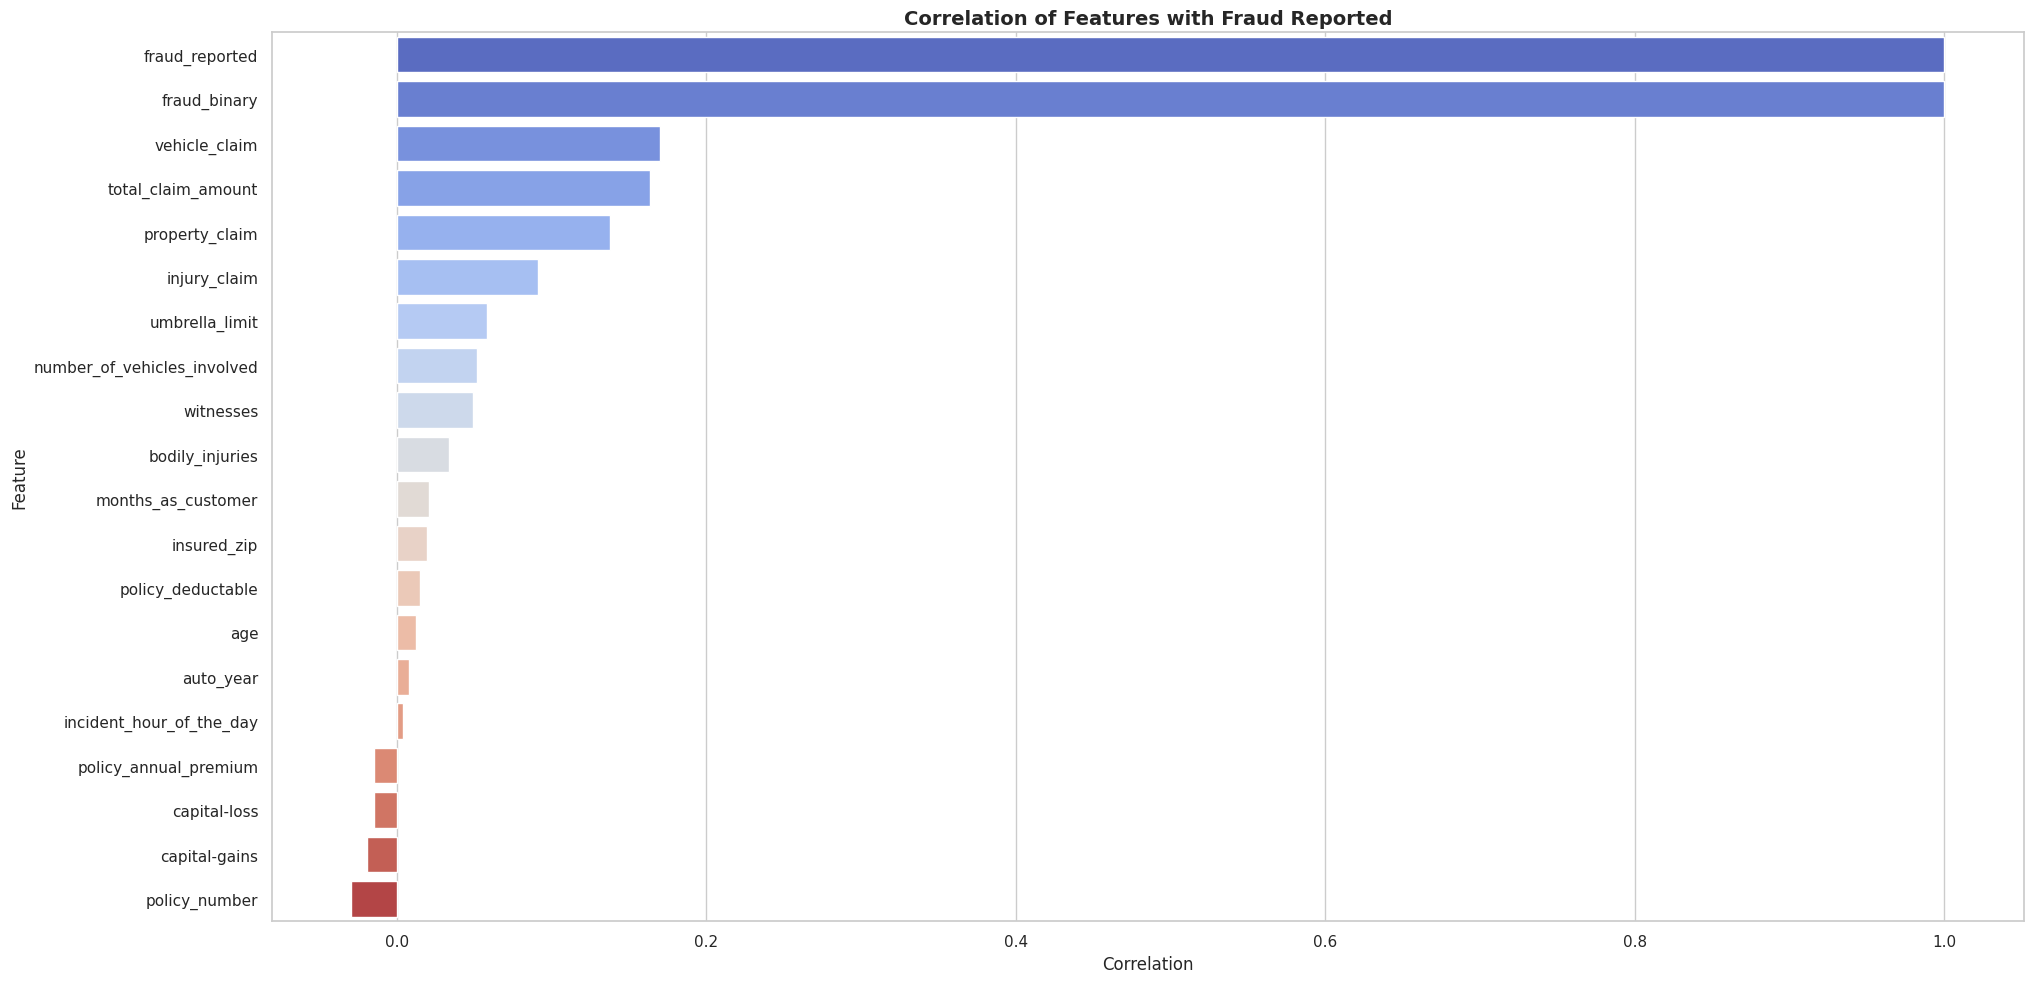

In [134]:
# Encode fraud: 'Y' as 1 (fraud) and 'N' as 0 (no fraud)
df_corr = df.copy()
df_corr['fraud_reported'] = df_corr['fraud_reported'].map({'Y': 1, 'N': 0})

# Calculate correlation of each numeric feature with the fraud label
corr = df_corr.corr(numeric_only=True)['fraud_reported'].sort_values(ascending=False)

# Plot correlation values as a horizontal bar chart
plt.figure(figsize=(20.5, 10))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Correlation of Features with Fraud Reported", fontsize=14, fontweight='bold')
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

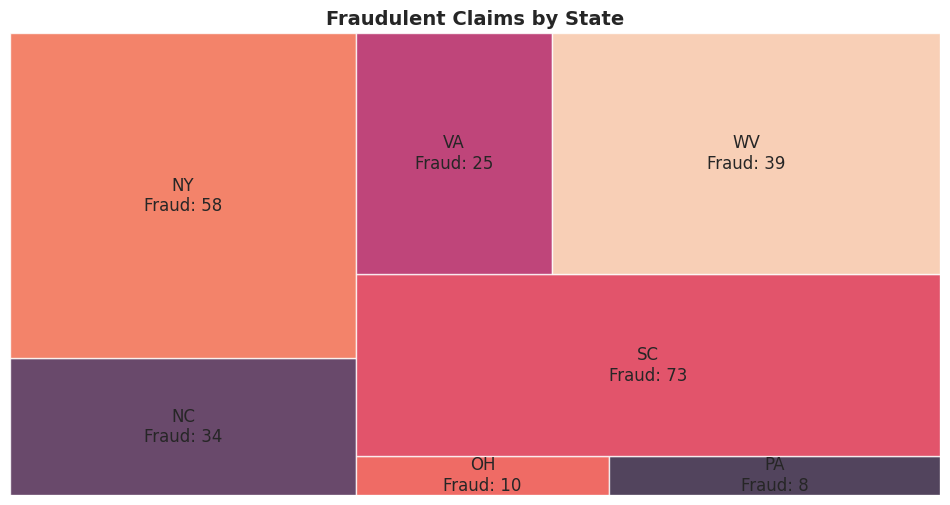

In [135]:
import squarify

# Count number of reports per state, split by fraud label
location_counts = df.groupby(['incident_state', 'fraud_reported']).size().unstack(fill_value=0)

# Create labels with state name and number of fraud cases
labels = [f"{state}\nFraud: {row['Y']}" for state, row in location_counts.iterrows()]

# Total number of claims per state (fraud + non-fraud)
sizes = location_counts['Y'] + location_counts['N']

# Plot treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title("Fraudulent Claims by State", fontsize=14, fontweight='bold')
plt.axis('off')  # Remove axes
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

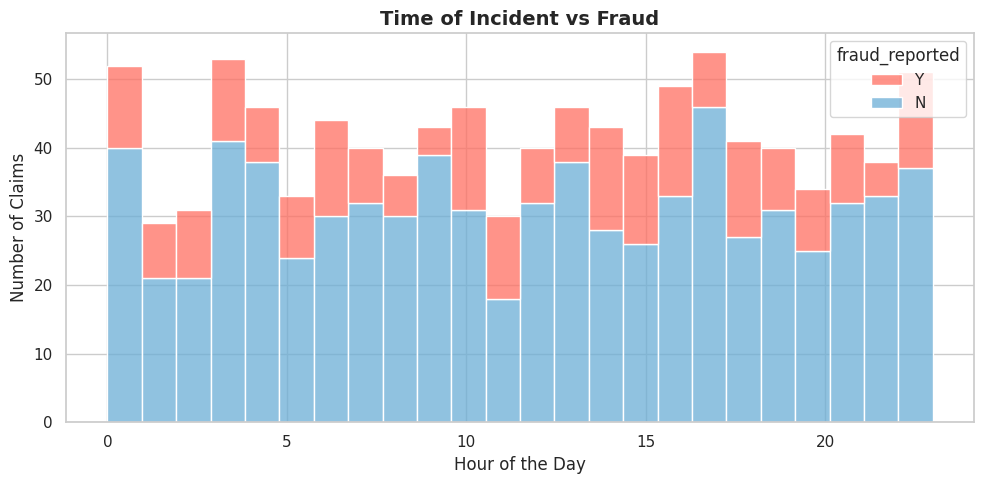

In [136]:
# Plot the distribution of incident times and overlay fraud vs non-fraud cases
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x='incident_hour_of_the_day',
    hue='fraud_reported',
    bins=24,
    multiple='stack',
    palette={"Y": "#FF6F61", "N": "#6BAED6"}
)

# Set plot title and axis labels
plt.title("Time of Incident vs Fraud", fontsize=14, fontweight='bold')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Claims")

# Improve layout
plt.tight_layout()
plt.show()

1. What are the key differences between fraudulent and non-fraudulent claims?

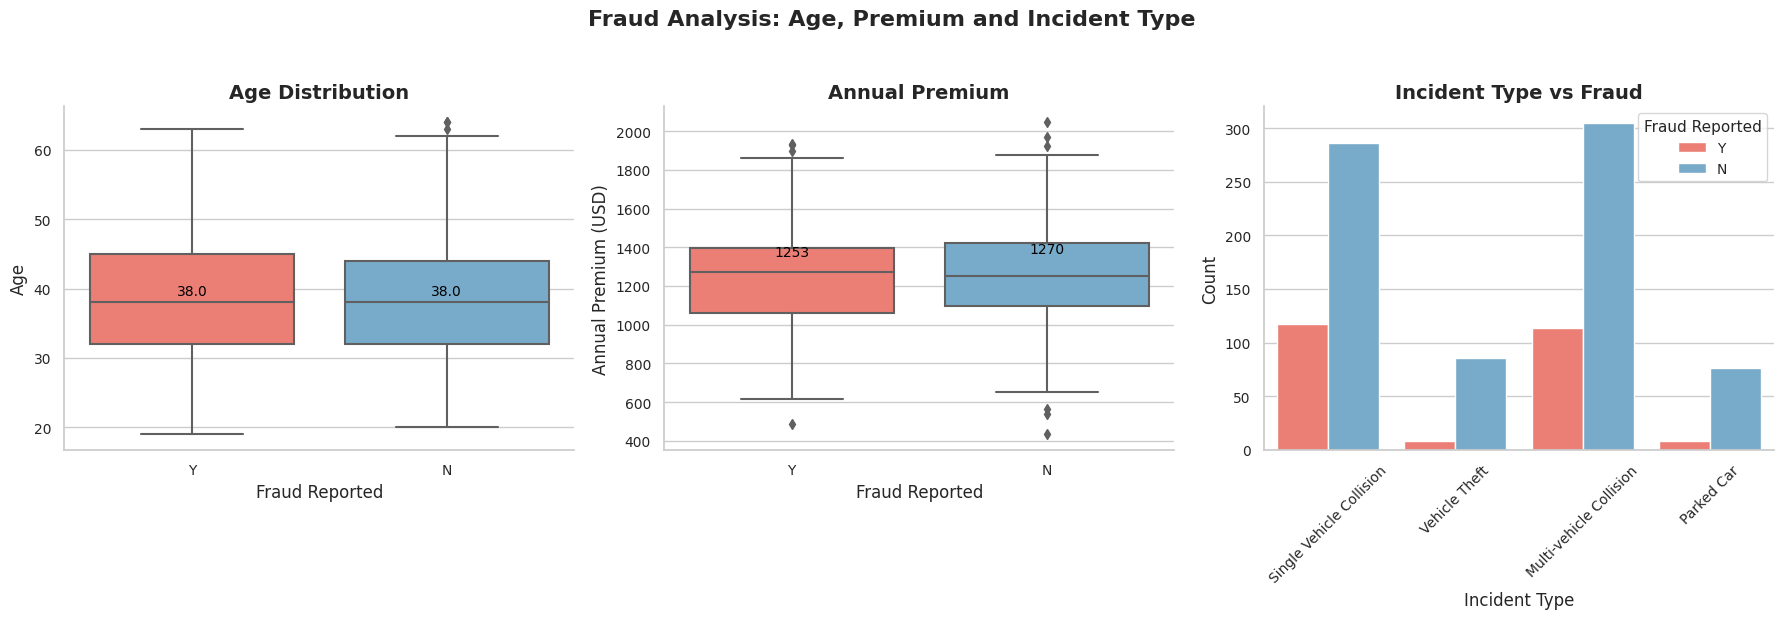

In [137]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

# --- 1. Age vs Fraud Reported ---
sns.boxplot(
    x='fraud_reported',
    y='age',
    data=df,
    palette={"Y": "#FF6F61", "N": "#6BAED6"},
    ax=axes[0]
)
axes[0].set_title("Age Distribution", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Fraud Reported", fontsize=12)
axes[0].set_ylabel("Age", fontsize=12)
axes[0].tick_params(labelsize=10)
sns.despine(ax=axes[0])

# Add median labels for age
age_medians = df.groupby('fraud_reported')['age'].median()
for i, median in enumerate(age_medians):
    axes[0].text(i, median + 1, f"{median:.1f}", ha='center', fontsize=10, color='black')

# --- 2. Premium vs Fraud Reported ---
sns.boxplot(
    x='fraud_reported',
    y='policy_annual_premium',
    data=df,
    palette={"Y": "#FF6F61", "N": "#6BAED6"},
    ax=axes[1]
)
axes[1].set_title("Annual Premium", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Fraud Reported", fontsize=12)
axes[1].set_ylabel("Annual Premium (USD)", fontsize=12)
axes[1].tick_params(labelsize=10)
sns.despine(ax=axes[1])

# Add median labels for premium
premium_medians = df.groupby('fraud_reported')['policy_annual_premium'].median()
for i, median in enumerate(premium_medians):
    axes[1].text(i, median + 100, f"{median:.0f}", ha='center', fontsize=10, color='black')

# --- 3. Incident Type vs Fraud Reported ---
sns.countplot(
    x='incident_type',
    hue='fraud_reported',
    data=df,
    palette={"Y": "#FF6F61", "N": "#6BAED6"},
    ax=axes[2]
)
axes[2].set_title("Incident Type vs Fraud", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Incident Type", fontsize=12)
axes[2].set_ylabel("Count", fontsize=12)
axes[2].tick_params(labelsize=10)
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title="Fraud Reported", fontsize=10, title_fontsize=11)
sns.despine(ax=axes[2])

# Final layout
plt.suptitle("Fraud Analysis: Age, Premium and Incident Type", fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

2. Which customer demographics are more likely to file high-value claims?

/tmp/ipykernel_8520/520054669.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


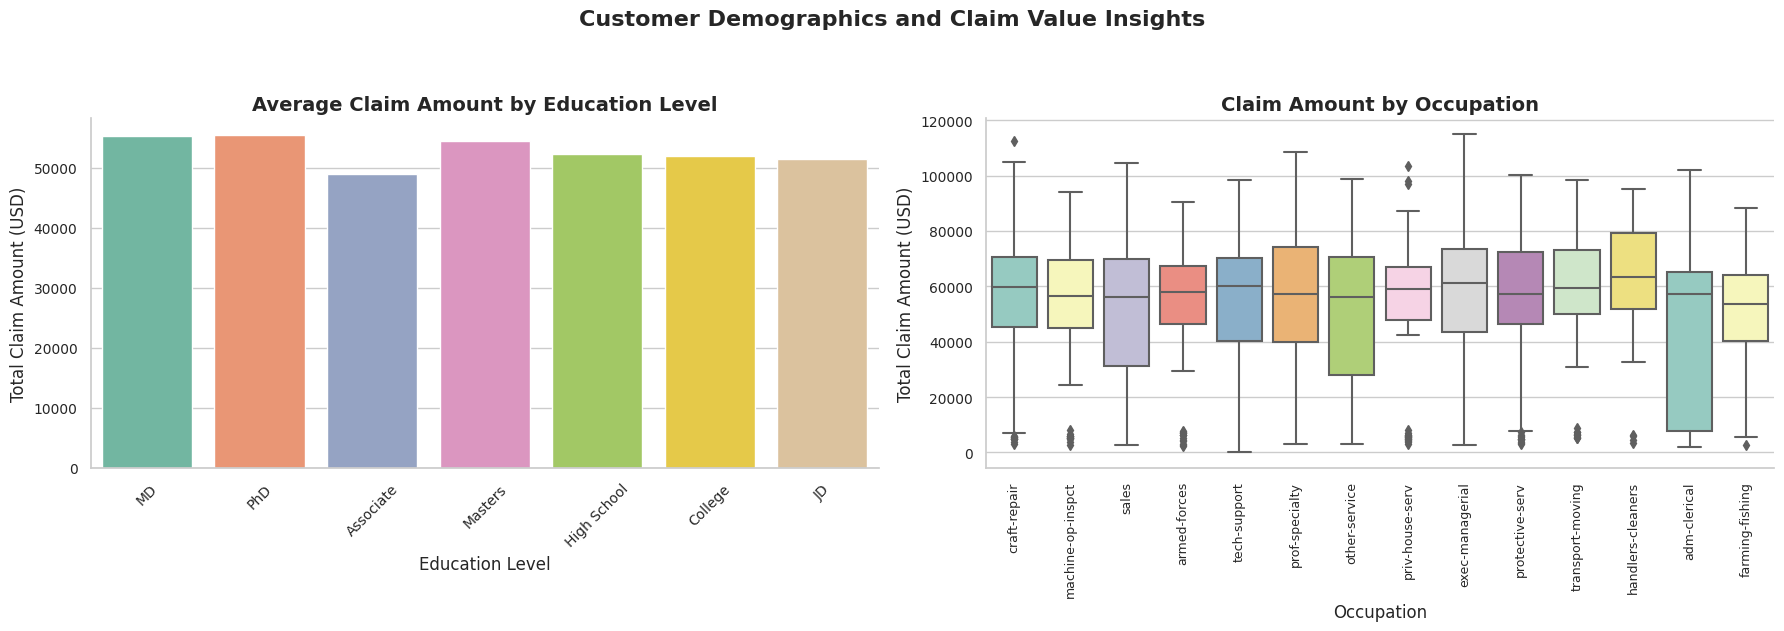

In [138]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

# --- Plot 1: Barplot (Education Level vs Total Claim Amount) ---
sns.barplot(
    x='insured_education_level',
    y='total_claim_amount',
    data=df,
    ci=None,
    ax=axes[0],
    palette="Set2",
    estimator='mean')

axes[0].set_title("Average Claim Amount by Education Level", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Education Level", fontsize=12)
axes[0].set_ylabel("Total Claim Amount (USD)", fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
sns.despine(ax=axes[0])

# --- Plot 2: Boxplot (Occupation vs Total Claim Amount) ---
sns.boxplot(
    x='insured_occupation',
    y='total_claim_amount',
    data=df,
    ax=axes[1],
    palette="Set3"
)
axes[1].set_title("Claim Amount by Occupation", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Occupation", fontsize=12)
axes[1].set_ylabel("Total Claim Amount (USD)", fontsize=12)
axes[1].tick_params(axis='x', rotation=90, labelsize=9)
axes[1].tick_params(axis='y', labelsize=10)
sns.despine(ax=axes[1])

# Final layout
plt.suptitle("Customer Demographics and Claim Value Insights", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

3. Are certain types of incidents or collision types more frequently associated with fraud?

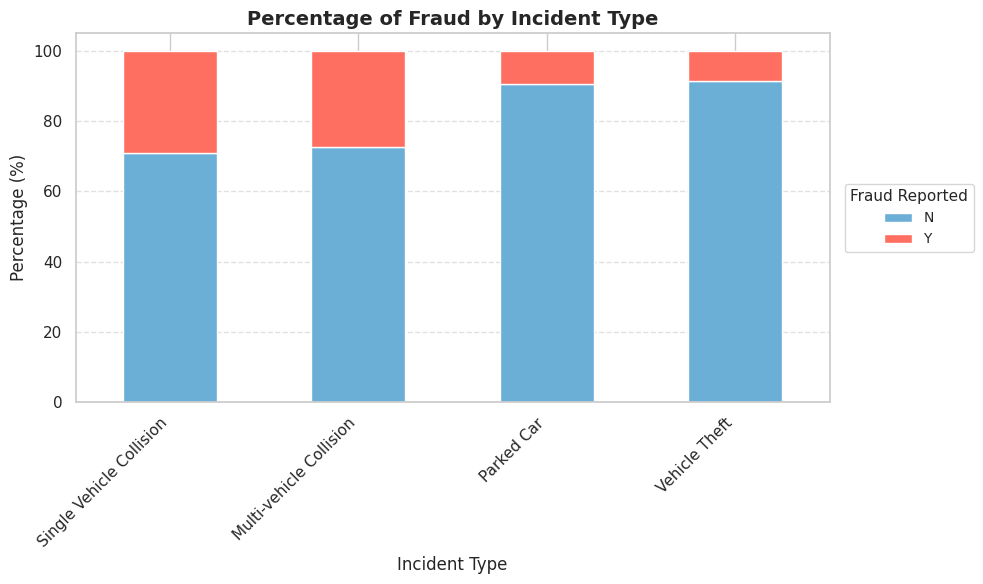

In [139]:
# Create normalized crosstab (row-wise %)
fraud_by_incident = pd.crosstab(
    df['incident_type'],
    df['fraud_reported'],
    normalize='index'
) * 100

# Sort by fraud percentage (optional)
fraud_by_incident = fraud_by_incident.sort_values(by='Y', ascending=False)

# Plot stacked bar
ax = fraud_by_incident.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color={"N": "#6BAED6", "Y": "#FF6F61"}
)

# Customize axes and title
plt.title("Percentage of Fraud by Incident Type", fontsize=14, fontweight='bold')
plt.xlabel("Incident Type", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Move legend to the right
plt.legend(
    title='Fraud Reported',
    title_fontsize=11,
    fontsize=10,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

# Final layout
plt.tight_layout()
plt.show()

4. Does the number of witnesses or police reports correlate with fraud detection?

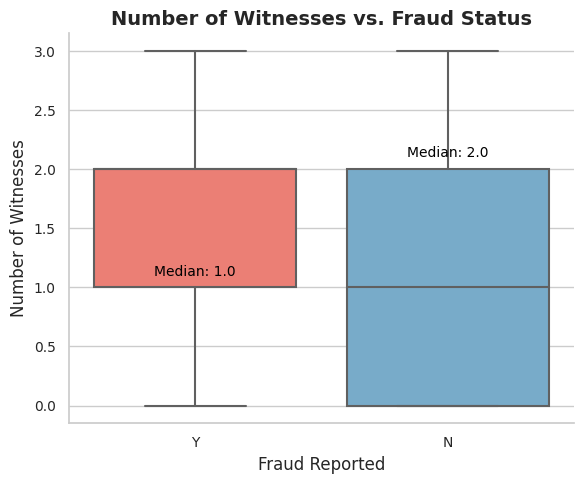

In [140]:
pd.crosstab(df['police_report_available'], df['fraud_reported'], normalize='index') * 100

# Create boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(
    x='fraud_reported',
    y='witnesses',
    data=df,
    palette={"Y": "#FF6F61", "N": "#6BAED6"}
)

# Customize title and axes
plt.title("Number of Witnesses vs. Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Reported", fontsize=12)
plt.ylabel("Number of Witnesses", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

# Add median labels
medians = df.groupby('fraud_reported')['witnesses'].median()
for i, median in enumerate(medians):
    plt.text(i, median + 0.1, f"Median: {median:.1f}", ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

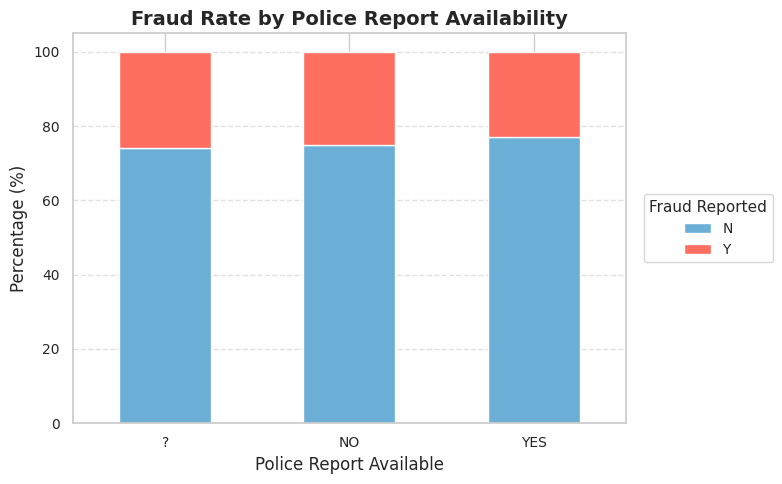

In [141]:
# Crosstab (percentual por linha)
report_fraud = pd.crosstab(
    df['police_report_available'],
    df['fraud_reported'],
    normalize='index'
) * 100

# Ordenar se desejar
report_fraud = report_fraud.sort_values(by='Y', ascending=False)

# Plot
ax = report_fraud.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color={"N": "#6BAED6", "Y": "#FF6F61"}
)

# Título e eixos
plt.title("Fraud Rate by Police Report Availability", fontsize=14, fontweight='bold')
plt.xlabel("Police Report Available", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Legenda ao lado
plt.legend(
    title="Fraud Reported",
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    fontsize=10,
    title_fontsize=11
)

# Grade e layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

5. How does the time of the incident impact the likelihood of a fraudulent claim?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

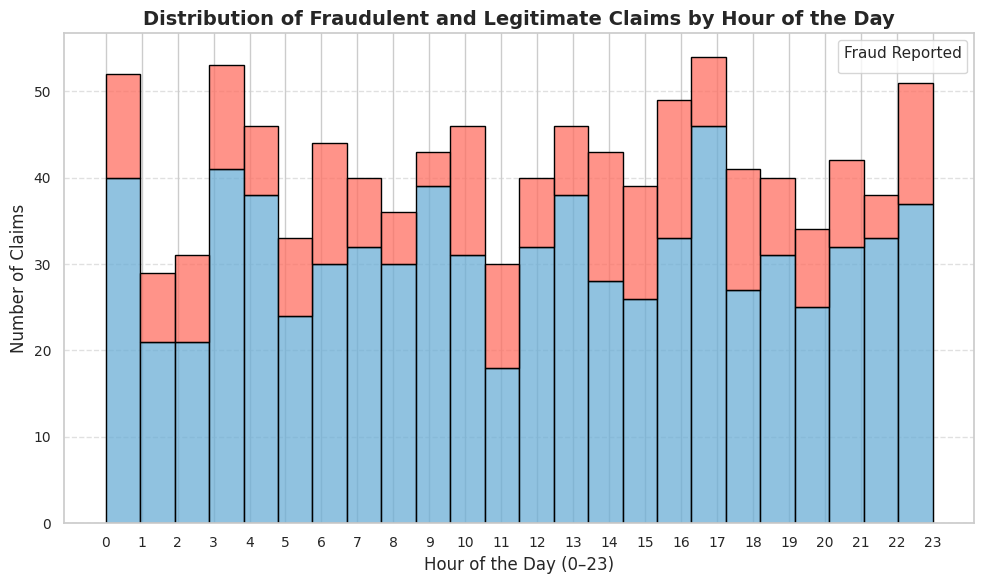

In [142]:
# Plot histogram stacked by fraud status
plt.figure(figsize=(10, 6))

#
sns.histplot(data=df,
             x='incident_hour_of_the_day',
             hue='fraud_reported',
             multiple='stack',
             bins=24,
             palette={"Y": "#FF6F61", "N": "#6BAED6"},
             edgecolor='black')

# Customize axes and title
plt.title("Distribution of Fraudulent and Legitimate Claims by Hour of the Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of the Day (0–23)", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.xticks(ticks=range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Fraud Reported', title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

6. Which cities or states have the highest concentration of fraudulent claims?

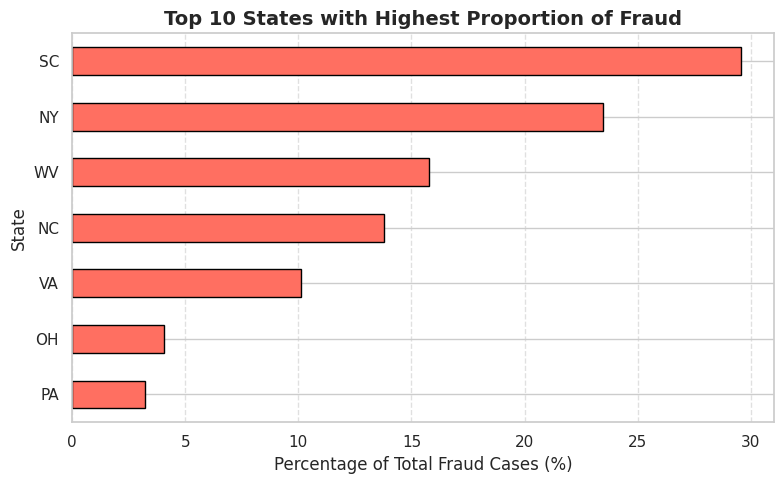

In [143]:
# Calculate the percentage of fraud cases by state and city
fraud_by_state = df[df['fraud_reported'] == 'Y']['incident_state'].value_counts(normalize=True) * 100
fraud_by_city = df[df['fraud_reported'] == 'Y']['incident_city'].value_counts(normalize=True) * 100

# Plot the top 10 states with the highest proportion of fraud cases
fraud_by_state.head(10).sort_values().plot(
    kind='barh',             # Horizontal bar chart
    figsize=(8, 5),          # Set figure size
    color='#FF6F61',         # Fraud color
    edgecolor='black'        # Border color for bars
)

# Set plot title and axis labels
plt.title("Top 10 States with Highest Proportion of Fraud", fontsize=14, fontweight='bold')
plt.xlabel("Percentage of Total Fraud Cases (%)", fontsize=12)
plt.ylabel("State", fontsize=12)

# Add gridlines to the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()

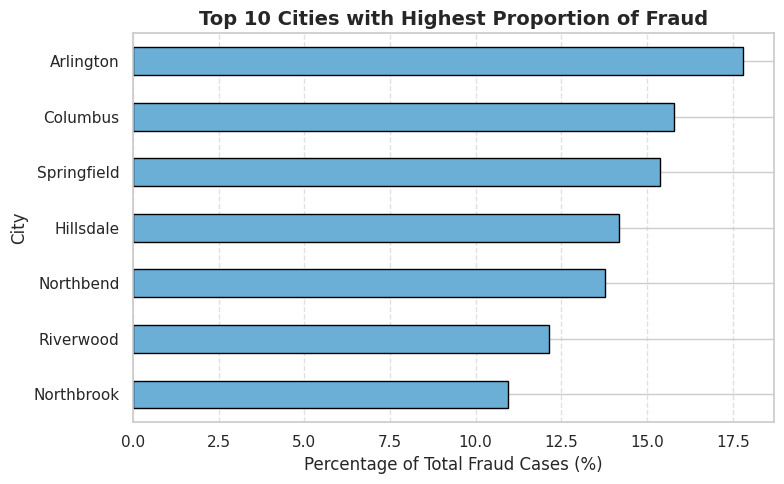

In [144]:
fraud_by_city.head(10).sort_values().plot(
    kind='barh',
    figsize=(8, 5),
    color='#6BAED6',
    edgecolor='black'
)

plt.title("Top 10 Cities with Highest Proportion of Fraud", fontsize=14, fontweight='bold')
plt.xlabel("Percentage of Total Fraud Cases (%)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

7. Is there a significant relationship between the customer’s policy details and fraud likelihood?

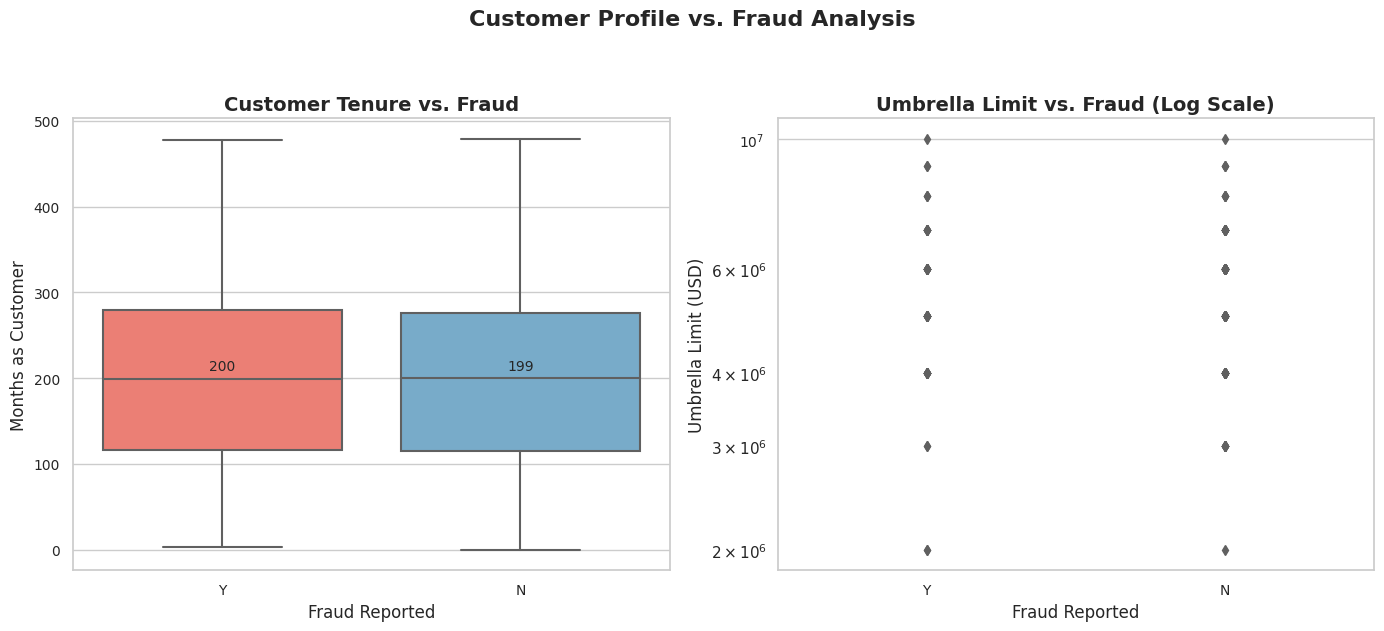

In [145]:
# Subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.4)

# --- Plot 1: Customer Tenure ---
sns.boxplot(
    x='fraud_reported',
    y='months_as_customer',
    data=df,
    ax=axes[0],
    palette={"Y": "#FF6F61", "N": "#6BAED6"}
)
axes[0].set_title("Customer Tenure vs. Fraud", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Fraud Reported", fontsize=12)
axes[0].set_ylabel("Months as Customer", fontsize=12)
axes[0].tick_params(labelsize=10)

# Add median labels
medians1 = df.groupby('fraud_reported')['months_as_customer'].median()
for i, median in enumerate(medians1):
    axes[0].text(i, median + 10, f"{median:.0f}", ha='center', fontsize=10)

# --- Plot 2: Umbrella Limit (with log scale) ---
sns.boxplot(
    x='fraud_reported',
    y='umbrella_limit',
    data=df,
    ax=axes[1],
    palette={"Y": "#FF6F61", "N": "#6BAED6"}
)
axes[1].set_yscale('log')  # log scale to handle large outliers
axes[1].set_title("Umbrella Limit vs. Fraud (Log Scale)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Fraud Reported", fontsize=12)
axes[1].set_ylabel("Umbrella Limit (USD)", fontsize=12)
axes[1].tick_params(labelsize=10)

# Layout final
plt.suptitle("Customer Profile vs. Fraud Analysis", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

8. What is the average financial loss from fraudulent claims compared to legitimate ones?

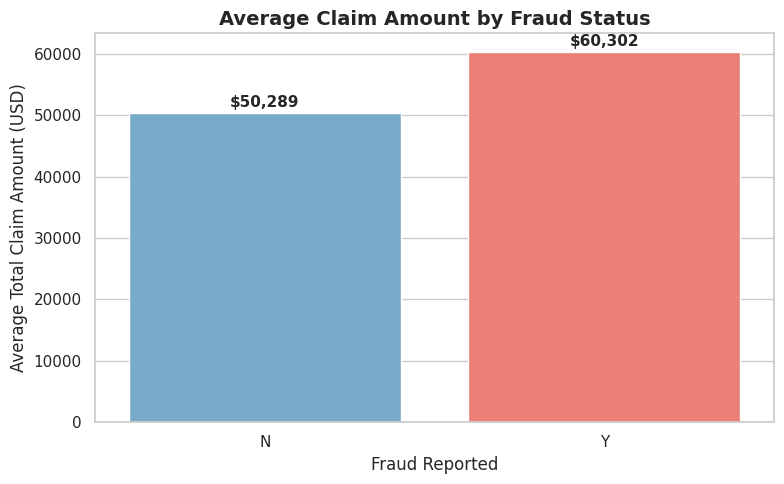

In [146]:
# Calculate average claim amount for each fraud status
mean_claim = df.groupby('fraud_reported')['total_claim_amount'].mean()

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=mean_claim.index,
    y=mean_claim.values,
    palette={"N": "#6BAED6", "Y": "#FF6F61"}  # Color mapping: N = Not Fraud, Y = Fraud
)

# Add title and axis labels
plt.title("Average Claim Amount by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Reported", fontsize=12)
plt.ylabel("Average Total Claim Amount (USD)", fontsize=12)

# Add value labels above each bar
for i, value in enumerate(mean_claim.values):
    plt.text(i, value + 1000, f"${value:,.0f}", ha='center', fontsize=11, fontweight='bold')

# Final layout adjustment
plt.tight_layout()
plt.show()

9. Do certain auto makes or models appear more frequently in fraudulent claims?

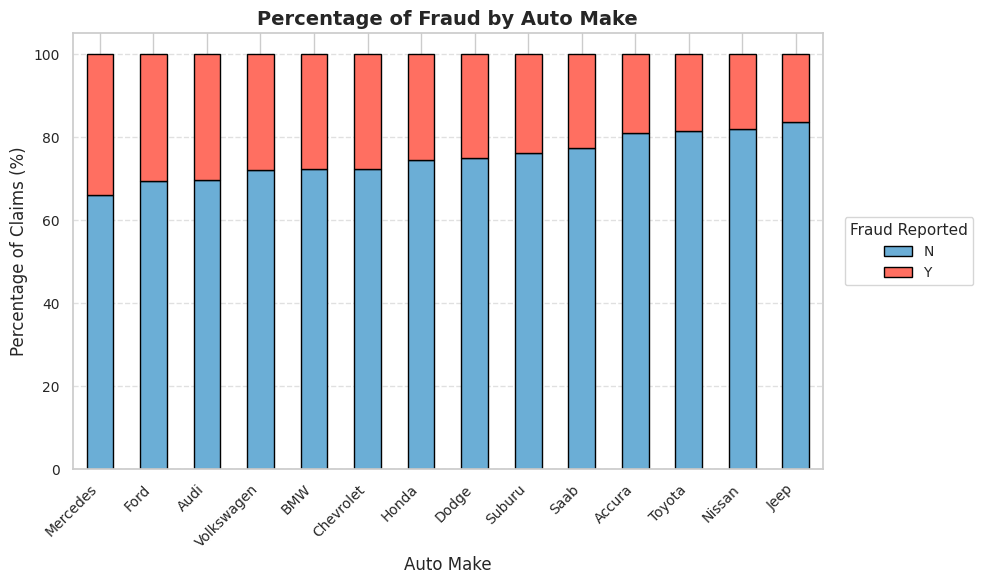

In [147]:
# Create a normalized crosstab to calculate fraud percentage by car brand
fraud_by_make = pd.crosstab(
    df['auto_make'],
    df['fraud_reported'],
    normalize='index'
) * 100

# Sort by highest fraud percentage (optional)
fraud_by_make = fraud_by_make.sort_values(by='Y', ascending=False)

# Plot stacked bar chart
ax = fraud_by_make.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color={"N": "#6BAED6", "Y": "#FF6F61"},
    edgecolor='black'
)

# Titles and labels
plt.title("Percentage of Fraud by Auto Make", fontsize=14, fontweight='bold')
plt.xlabel("Auto Make", fontsize=12)
plt.ylabel("Percentage of Claims (%)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Move legend to the side
plt.legend(
    title='Fraud Reported',
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    fontsize=10,
    title_fontsize=11
)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Part 5 - Pre-processing

In [148]:
# Exclude irrelevant or problematic columns
columns_to_drop = ['fraud_binary']

# Drop the selected columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [149]:
# Target: 'Y' = fraud, 'N' = not fraud
target = 'fraud_reported'  

# Features: drop the target column
X = df.drop(columns=[target])

# Convert target to binary (1 = fraud, 0 = not fraud)
y = df[target].map({'Y': 1, 'N': 0})

# Part 6 - Feature Engineering

In [150]:
# Identify categorical columns (of type 'object')
cat_cols = df.select_dtypes(include='object').columns

# Apply LabelEncoder to all categorical columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # store the encoders in case inverse transformation is needed later

# Check the result
print("Encoded columns:", cat_cols.tolist())
df.head()

Encoded columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,940,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,635,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,413,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,922,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


# Part 7 - Training and testing division

In [151]:
# Separate X (features) and y (target)
X = df.drop(columns='fraud_reported')

# Define y as the target variable
y = df['fraud_reported']

# Part 8 - Model Training

In [152]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Part 9 - Model Machine learning

In [153]:
# Dictionary of classification models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
}

# Store performance results for each model
results = []

# Loop through all models and evaluate them
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    preds = model.predict(X_test)               # Predicted labels
    probs = model.predict_proba(X_test)[:, 1]   # Predicted probabilities

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc = roc_auc_score(y_test, probs)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1,
        "ROC-AUC": roc
    })

# Convert results into a DataFrame and sort by ROC-AUC
df_results = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
df_results.reset_index(drop=True, inplace=True)
df_results

[LightGBM] [Info] Number of positive: 198, number of negative: 602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3130
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247500 -> initscore=-1.111990
[LightGBM] [Info] Start training from score -1.111990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Model,Accuracy,F1-Score,ROC-AUC
0,LightGBM,0.815,0.593407,0.849169
1,Extra Trees,0.780,0.312500,0.842546
2,XGBoost,0.810,0.577778,0.841735
3,Bagging,0.825,0.578313,0.839708
4,Gradient Boosting,0.825,0.615385,0.839573
5,Random Forest,0.805,0.493506,0.826733
6,AdaBoost,0.785,0.481928,0.794297
7,Logistic Regression,0.750,0.000000,0.614407


# Part 10 - Metrics and Evaluations

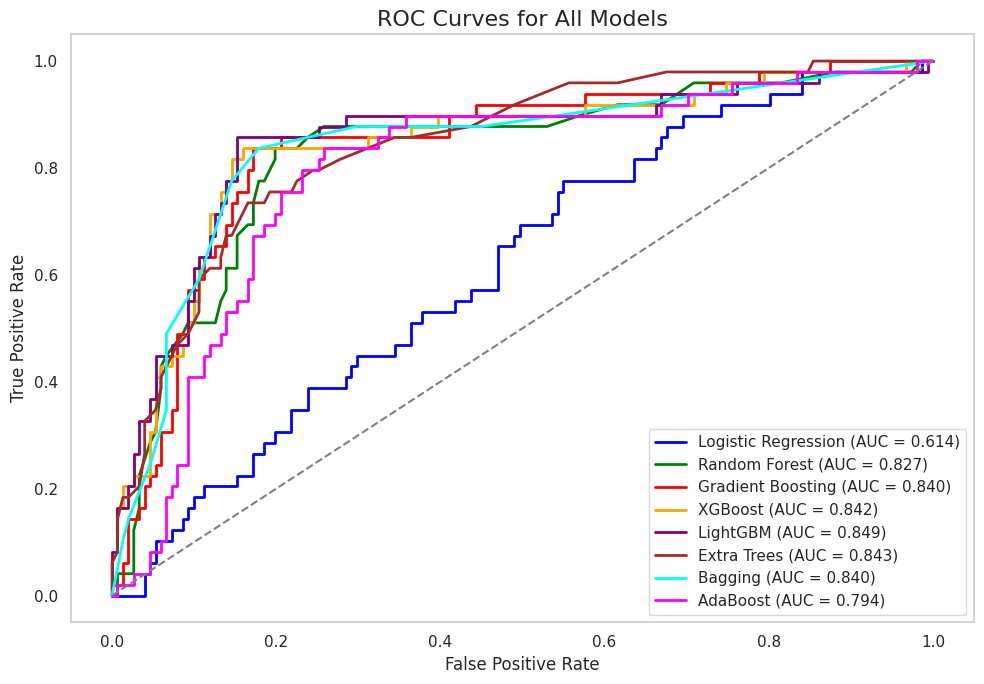

In [154]:
# List of colors for distinguishing models
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'cyan', 'magenta']

plt.figure(figsize=(10, 7))
plt.title("ROC Curves for All Models", fontsize=16)

# Plot ROC curve for each trained model
for idx, (name, model) in enumerate(models.items()):
    # Predicted probabilities for positive class
    probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color=colors[idx % len(colors)],
             label=f"{name} (AUC = {roc_auc:.3f})", linewidth=2)

# Reference diagonal line (random guess)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Graph styling
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.grid(False)
plt.show()

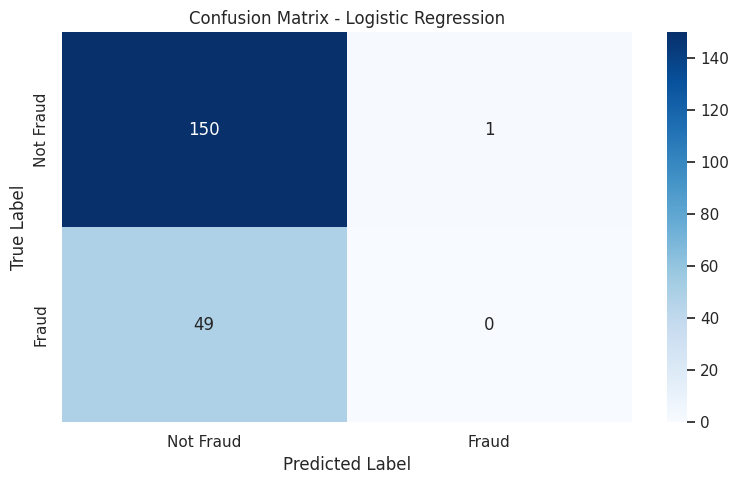

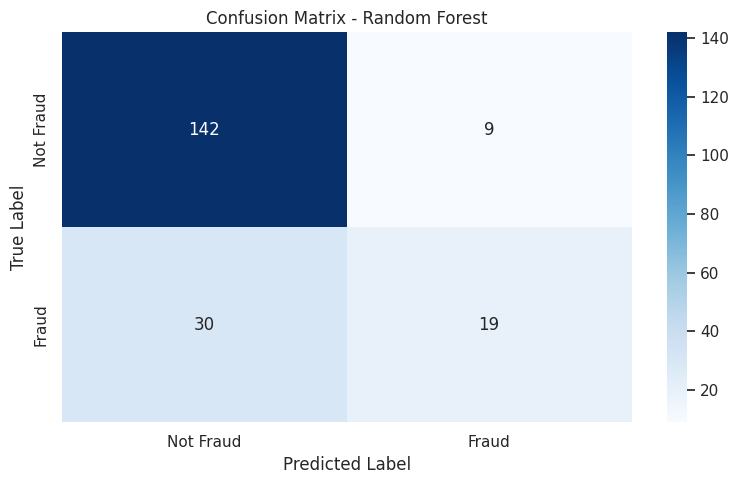

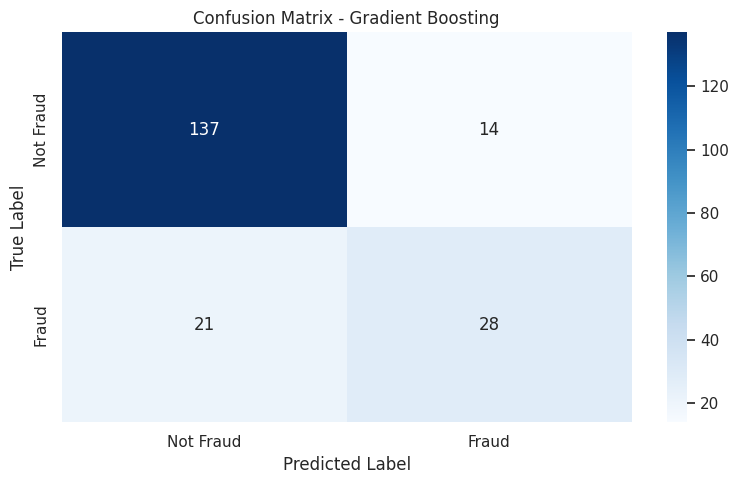

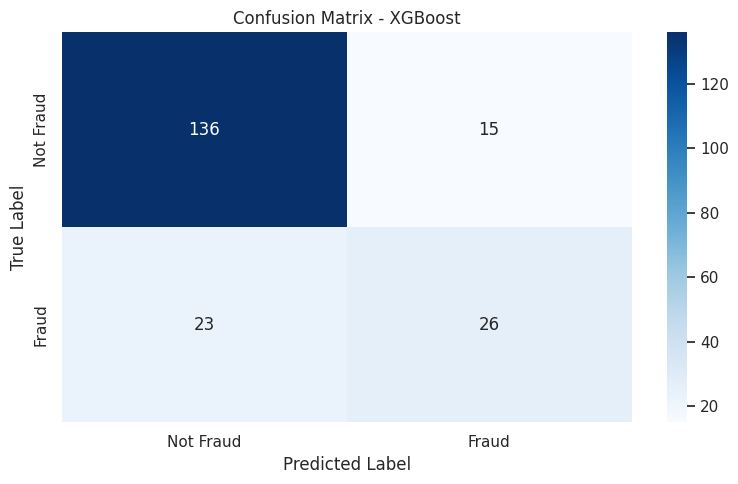

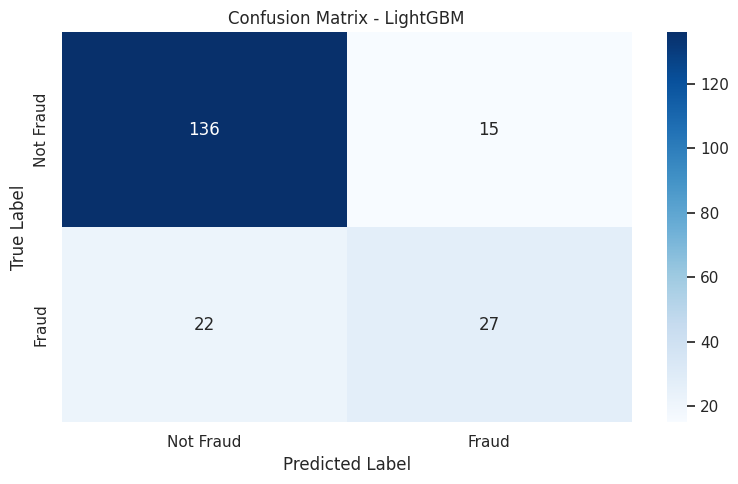

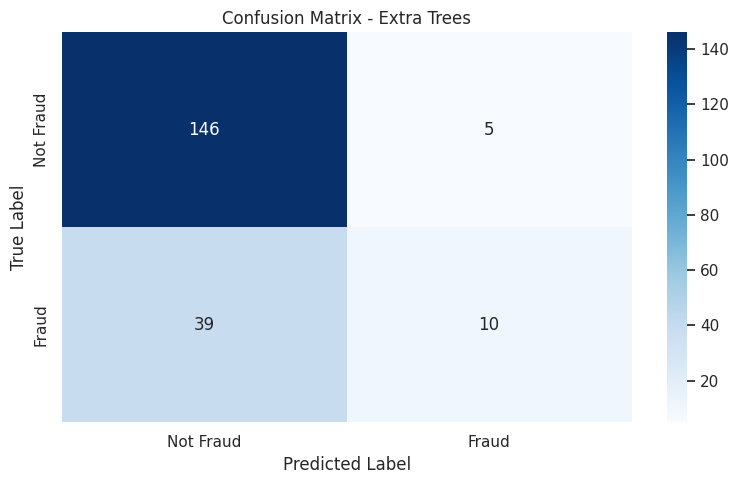

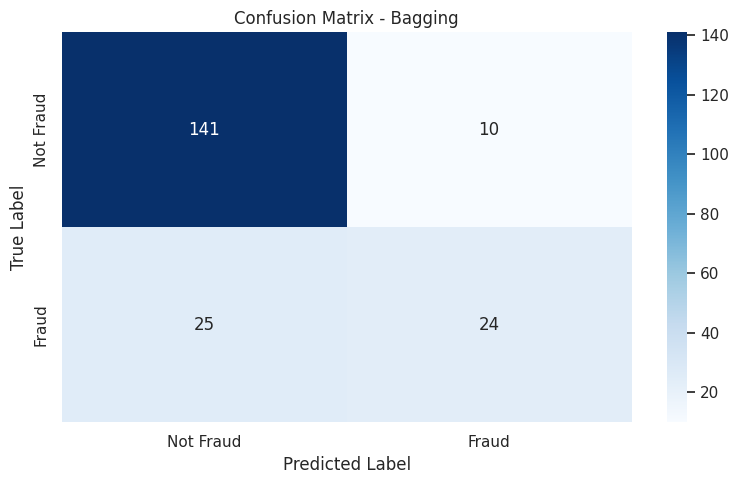

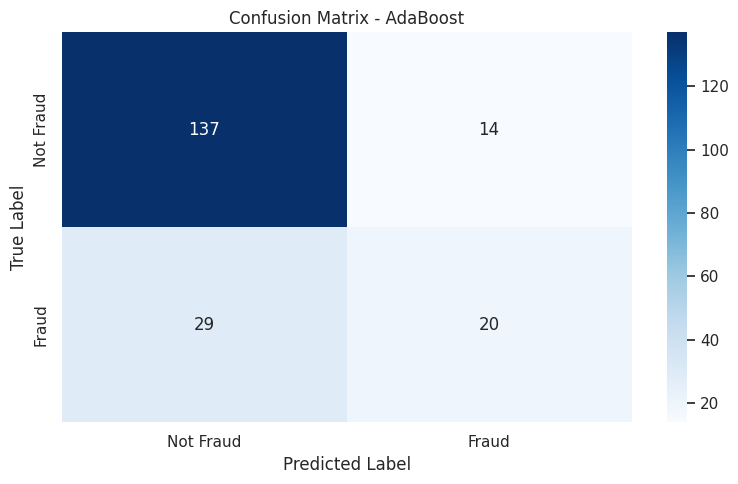

In [155]:
# Function to plot confusion matrix using seaborn
def plot_confusion_seaborn(model, X_test, y_test, model_name):
    
    # Get predictions
    preds = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, preds)
    
    # Plot
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"])
    
    plt.title(f"Confusion Matrix - {model_name}", fontsize=12)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Loop over all models and plot their confusion matrices
for name, model in models.items():
    plot_confusion_seaborn(model, 
                           X_test, 
                           y_test,
                           name)

In [156]:
# Loop through all models to print classification reports
for name, model in models.items():
    print(f"\nClassification Report - {name}")
    
    # Predict labels
    preds = model.predict(X_test)
    
    # Display precision, recall, F1-score, and support
    print(classification_report(
        y_test,
        preds,
        target_names=["Not Fraud", "Fraud"]
    ))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

   Not Fraud       0.75      0.99      0.86       151
       Fraud       0.00      0.00      0.00        49

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.75      0.65       200


Classification Report - Random Forest
              precision    recall  f1-score   support

   Not Fraud       0.83      0.94      0.88       151
       Fraud       0.68      0.39      0.49        49

    accuracy                           0.81       200
   macro avg       0.75      0.66      0.69       200
weighted avg       0.79      0.81      0.78       200


Classification Report - Gradient Boosting
              precision    recall  f1-score   support

   Not Fraud       0.87      0.91      0.89       151
       Fraud       0.67      0.57      0.62        49

    accuracy                           0.82       200
 

# Part 11 - Modelos final

[LightGBM] [Info] Number of positive: 198, number of negative: 602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3130
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247500 -> initscore=-1.111990
[LightGBM] [Info] Start training from score -1.111990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

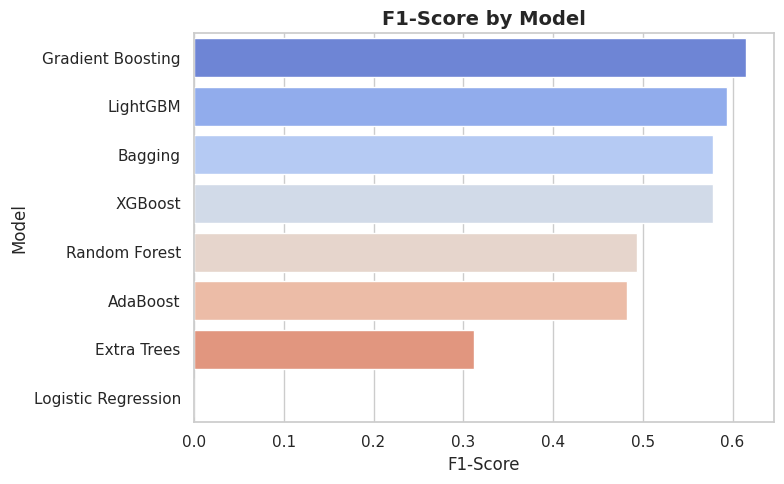

,Model,F1-Score
2,Gradient Boosting,0.6154
4,LightGBM,0.5934
6,Bagging,0.5783
3,XGBoost,0.5778
1,Random Forest,0.4935
7,AdaBoost,0.4819
5,Extra Trees,0.3125
0,Logistic Regression,0.0000


In [157]:
# List to store F1-Score results
f1_results = []

# Loop through all models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    preds = model.predict(X_test)  # Make predictions

    f1 = f1_score(y_test, preds)  # Calculate F1-score

    # Save result
    f1_results.append({
        "Model": name,
        "F1-Score": round(f1, 4)
    })

# Create DataFrame and sort by F1-Score
df_f1_scores = pd.DataFrame(f1_results).sort_values(by="F1-Score", ascending=False)

# Plot F1-Score for each model
plt.figure(figsize=(8, 5))
sns.barplot(data=df_f1_scores, x='F1-Score', y='Model', palette='coolwarm')
plt.title("F1-Score by Model", fontsize=14, fontweight='bold')
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# Display the results table
print()
df_f1_scores

[LightGBM] [Info] Number of positive: 198, number of negative: 602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3130
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247500 -> initscore=-1.111990
[LightGBM] [Info] Start training from score -1.111990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

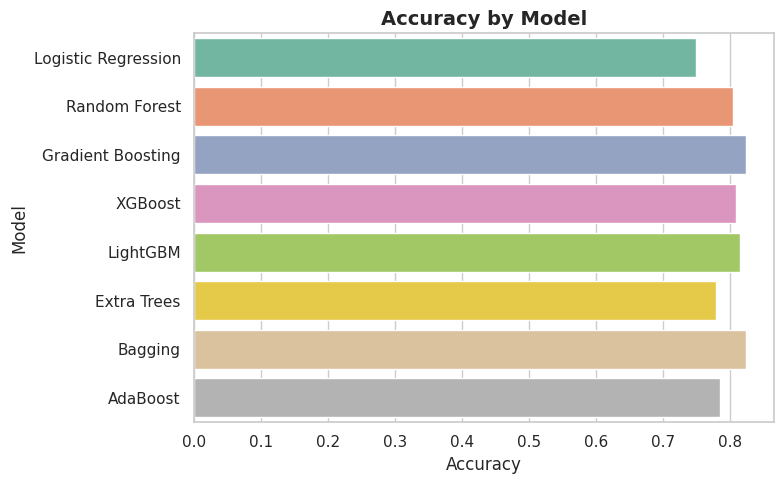

,Model,Accuracy,Recall,F1-Score
0,Logistic Regression,0.750000,0.000000,0.000000
1,Random Forest,0.805000,0.387755,0.493506
2,Gradient Boosting,0.825000,0.571429,0.615385
3,XGBoost,0.810000,0.530612,0.577778
4,LightGBM,0.815000,0.551020,0.593407
5,Extra Trees,0.780000,0.204082,0.312500
6,Bagging,0.825000,0.489796,0.578313
7,AdaBoost,0.785000,0.408163,0.481928


In [158]:
# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Recall": rec,
        "F1-Score": f1
    })

# DataFrame with evaluation metrics
df_metrics = pd.DataFrame(results)

# Highlight the best model in each metric with yellow background
highlight = df_metrics[["Accuracy", "Recall", "F1-Score"]].apply(lambda col: col == col.max())
highlight_color = 'background-color: green'
styled_df = df_metrics.style.apply(lambda df: highlight.replace({True: highlight_color, False: ''}), axis=None)

# Bar chart - Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(data=df_metrics, x='Accuracy', y='Model', palette='Set2')
plt.title("Accuracy by Model", fontsize=14, fontweight='bold')  # Adjusted chart title
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# Display the styled DataFrame
styled_df

In [159]:
# Create folder to save the models
os.makedirs("saved_models", exist_ok=True)

# Save each trained model
for name, model in models.items():
    filename = f"saved_models/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)
    print(f"Model saved: {filename}")

Model saved: saved_models/logistic_regression.pkl
Model saved: saved_models/random_forest.pkl
Model saved: saved_models/gradient_boosting.pkl
Model saved: saved_models/xgboost.pkl
Model saved: saved_models/lightgbm.pkl
Model saved: saved_models/extra_trees.pkl
Model saved: saved_models/bagging.pkl
Model saved: saved_models/adaboost.pkl


# Part 12 - Trained Model Prediction

In [160]:
# Load the saved model
model = joblib.load("/kaggle/working/saved_models/gradient_boosting.pkl")

In [161]:
# Input dictionary with a new insurance claim (example)
input_data = {
    'policy_state': 'OH',
    'policy_csl': '250/500',
    'insured_sex': 'MALE',
    'insured_education_level': 'PhD',
    'incident_type': 'Multi-vehicle Collision',
    'collision_type': 'Rear Collision',
    'incident_severity': 'Major Damage',
    'authorities_contacted': 'Police',
    'incident_state': 'NY',
    'incident_city': 'New York',
    'policy_bind_date': '2019-08-15',
    'incident_date': '2019-09-25',
    'insured_hobbies': 'chess',
    'auto_make': 'BMW',
    'auto_model': 'X5',
    'auto_year': 2015,
    'umbrella_limit': 1000000,
    'capital-gains': 0,
    'capital-loss': 0,
    'incident_hour_of_the_day': 14,
    'number_of_vehicles_involved': 2,
    'bodily_injuries': 1,
    'witnesses': 2,
    'total_claim_amount': 40000,
    'injury_claim': 15000,
    'property_claim': 10000,
    'vehicle_claim': 15000,
    'age': 42
}

In [162]:
def predict_fraud(input_dict,
                  model_path="saved_models/best_model.pkl",
                  encoders_path="saved_models/label_encoders.pkl"):
    """
    Predicts fraud using the best trained model and plots a ROC curve with Seaborn.
    """

    # Load the best model and saved label encoders
    model = joblib.load(model_path)
    label_encoders = joblib.load(encoders_path)

    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Convert date columns to number of days since a reference date
    for col in ['policy_bind_date', 'incident_date']:
        if col in input_df.columns:
            input_df[col] = pd.to_datetime(input_df[col], errors='coerce')
            input_df[col] = (input_df[col] - pd.Timestamp("2000-01-01")).dt.days

    # Apply LabelEncoders to categorical features
    for col, le in label_encoders.items():
        if col in input_df.columns:
            val = input_df.at[0, col]
            if val in le.classes_:
                input_df.at[0, col] = le.transform([val])[0]
            else:
                input_df.at[0, col] = -1  # Assign unknown category as -1

    # Ensure all model input features are present
    for col in model.feature_names_in_:
        if col not in input_df.columns:
            input_df[col] = 0  # Add missing columns with default value 0

    # Reorder columns to match training data
    input_df = input_df[model.feature_names_in_]
    input_df = input_df.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Make prediction
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0][1]

    # Print result
    result = "FRAUD DETECTED" if prediction == 1 else "No fraud detected"
    print(f"\n Result: {result}")
    print(f" Probability of fraud: {proba:.2%}")

    # Simulate ROC curve (single point only)
    fpr = np.array([0, 1 - proba, 1])
    tpr = np.array([0, proba, 1])
    roc_auc = auc(fpr, tpr)

    # DataFrame for Seaborn plot
    roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

    # Plot ROC curve using Seaborn
    plt.figure(figsize=(6, 5))
    sns.lineplot(data=roc_df, x='FPR', y='TPR', label=f'AUC = {roc_auc:.2f}', linewidth=2.5, color='darkorange')
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='gray', label='Random Guess')
    sns.scatterplot(x=[1 - proba], y=[proba], s=100, color='red', label="Prediction Point")

    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve (Single Prediction Point)")
    plt.legend(loc='lower right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return prediction, proba


 Resultado: Sem fraude detectada
 Probabilidade de fraude: 32.53%


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

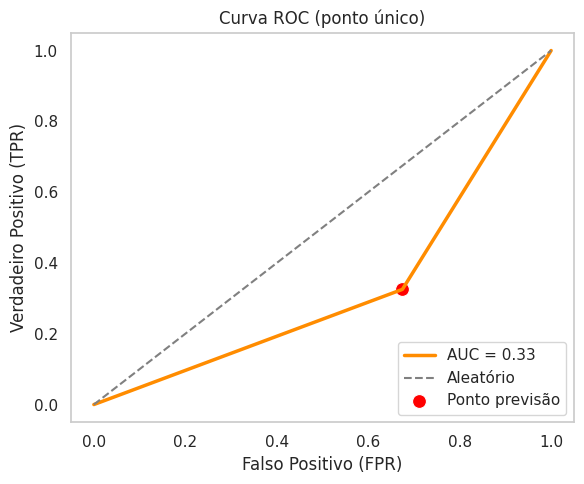

(0, 0.32530468521321715)

In [163]:
prever_fraude(input_data)


 Resultado: FRAUDE DETECTADA
 Probabilidade de fraude: 80.19%


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

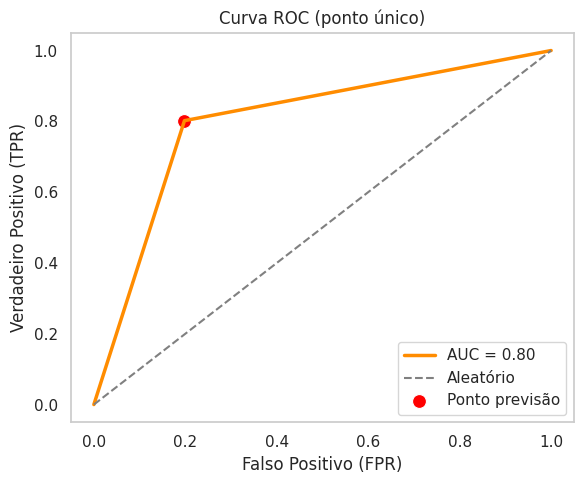

(1, 0.801875074129167)

In [164]:
input_data = {
    'months_as_customer': 119,
    'policy_state': 'OH',
    'policy_csl': '250/500',
    'policy_deductable': 500,
    'policy_annual_premium': 6423.0,
    'umbrella_limit': 0,
    'insured_sex': 'MALE',
    'insured_education_level': 'PhD',
    'insured_occupation': 'engineer',
    'insured_hobbies': 'chess',
    'insured_relationship': 'husband',
    'incident_type': 'Multi-vehicle Collision',
    'collision_type': 'Rear Collision',
    'incident_severity': 'Major Damage',
    'authorities_contacted': 'Police',
    'incident_state': 'OH',
    'incident_city': 'Columbus',
    'incident_location': '1234 Center St',
    'incident_hour_of_the_day': 17,
    'number_of_vehicles_involved': 3,
    'bodily_injuries': 1,
    'witnesses': 2,
    'total_claim_amount': 8000.0,
    'injury_claim': 4000.0,
    'property_claim': 2500.0,
    'vehicle_claim': 1500.0,
    'policy_bind_date': '2015-06-23',
    'incident_date': '2019-01-25'
}

prever_fraude(input_data)

# Part 13 – Neural Networks Perceptron MLP

In [165]:
# Normalization using StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform test data
X_test = scaler.transform(X_test)

# Display the scaler parameters (mean and scale)
scaler

StandardScaler()

In [166]:
# Dictionary with different neural network architectures
modelos_nn = {

    # Perceptron: Single-layer with sigmoid activation
    "Perceptron": Sequential([
        Dense(1, input_dim=X_train.shape[1], activation='sigmoid')
    ]),

    # Small MLP: One hidden layer
    "MLP_Small": Sequential([
        Dense(32, input_dim=X_train.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ]),

    # Medium MLP: Two hidden layers with dropout
    "MLP_Medium": Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),

    # Large MLP: Three hidden layers with dropout
    "MLP_Large": Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),

    # Deep MLP: Deeper architecture with stronger regularization
    "MLP_Deep": Sequential([
        Dense(256, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
}

# Compile and store the summary of each model
summaries = {}

# Iterate through models and compile
for name, model in modelos_nn.items():

    # Compile model with Adam optimizer and binary cross-entropy loss
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Store model summary (prints to console)
    print(f"Model Summary: {name}")
    summaries[name] = model.summary()

# Return the model names (optional)
summaries.keys()

Model Summary: Perceptron


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39 (156.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

Model Summary: MLP_Small


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 32)             │         1,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

Model Summary: MLP_Medium


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

Model Summary: MLP_Large


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

Model Summary: MLP_Deep


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 256)            │         9,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,249 (208.00 KB)

 Trainable params: 53,249 (208.00 KB)

 Non-trainable params: 0 (0.00 B)

dict_keys(['Perceptron', 'MLP_Small', 'MLP_Medium', 'MLP_Large', 'MLP_Deep'])

In [167]:
# Create directory to save the models (if it doesn't exist)
os.makedirs("saved_models_nn", exist_ok=True)

# Dictionary to store training histories
historicos = {}

# Training loop with history tracking
for name, model in modelos_nn.items():
    print(f"\n Training model: {name}")

    # Compile the model with Adam optimizer and binary crossentropy loss
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=30,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

    # Store the training history (loss and accuracy)
    historicos[name] = history.history

    # Save the trained model
    model.save(f"saved_models_nn/{name}.h5")


 Training model: Perceptron
Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5180 - loss: 0.8570 - val_accuracy: 0.5688 - val_loss: 0.8606
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5150 - loss: 0.8452 - val_accuracy: 0.5688 - val_loss: 0.8326
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5502 - loss: 0.7855 - val_accuracy: 0.5625 - val_loss: 0.8092
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5502 - loss: 0.7642 - val_accuracy: 0.5562 - val_loss: 0.7890
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5405 - loss: 0.7604 - val_accuracy: 0.5750 - val_loss: 0.7707
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5705 - loss: 0.7355 - val_accuracy: 0.5875 - val_loss: 0.7547
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5974 - loss: 0.7061 - val_accuracy: 0.5875 - val_loss: 0.7403
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5786 - loss: 0.7161 - va

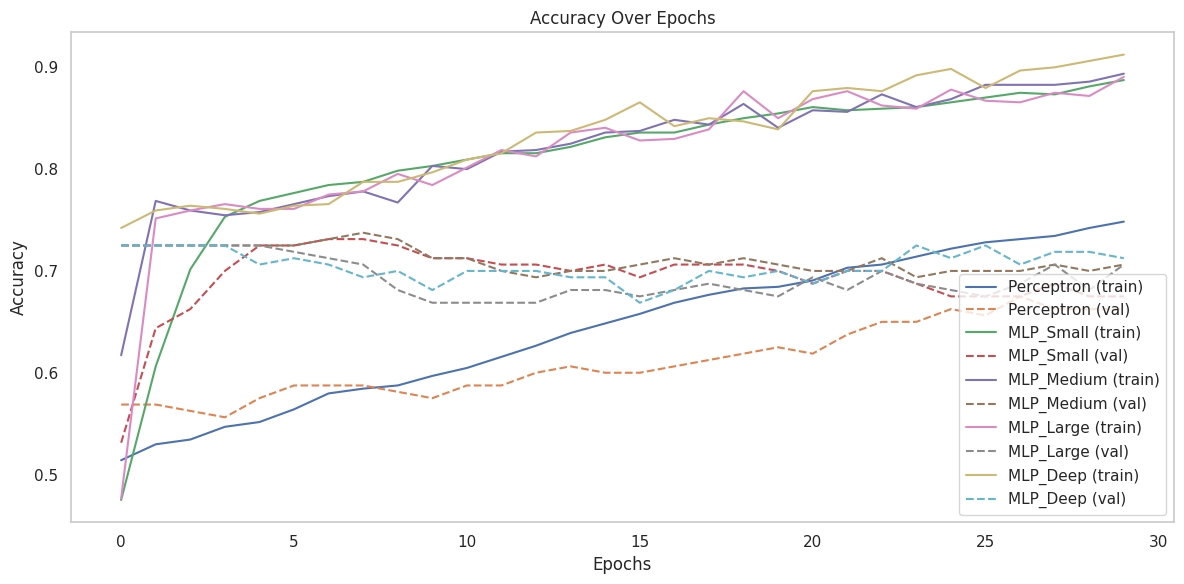

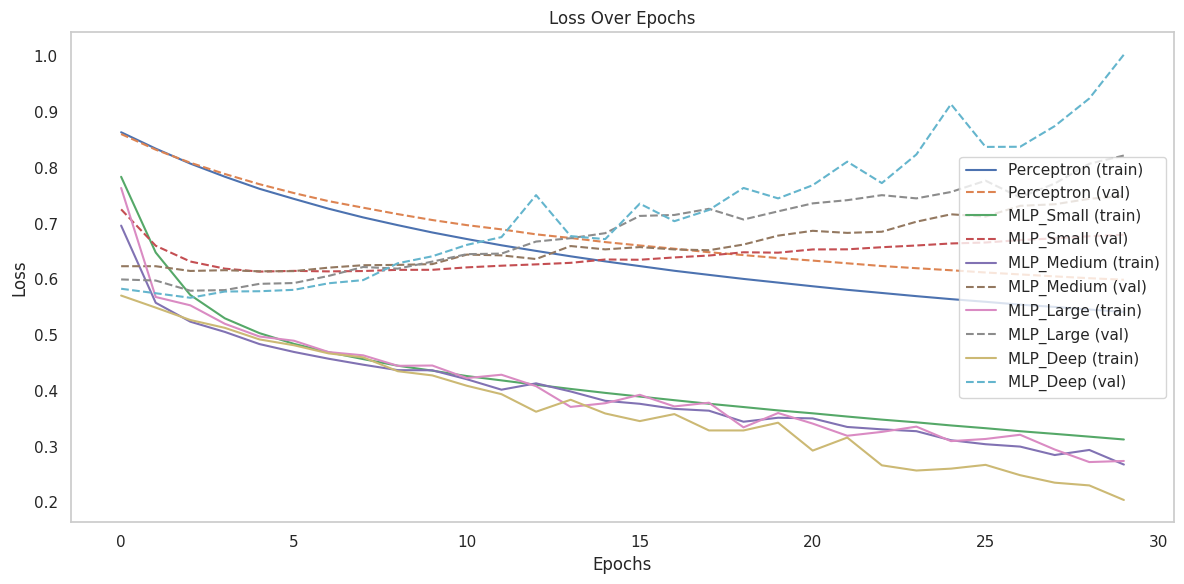

Model saved: saved_models_nn/Perceptron.keras
Model saved: saved_models_nn/MLP_Small.keras
Model saved: saved_models_nn/MLP_Medium.keras
Model saved: saved_models_nn/MLP_Large.keras
Model saved: saved_models_nn/MLP_Deep.keras


In [168]:
sns.set(style="whitegrid")

# Accuracy Plot
plt.figure(figsize=(12, 6))
for name, hist in historicos.items():
    plt.plot(hist['accuracy'], label=f"{name} (train)")
    plt.plot(hist['val_accuracy'], linestyle='--', label=f"{name} (val)")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Loss Plot
plt.figure(figsize=(12, 6))
for name, hist in historicos.items():
    plt.plot(hist['loss'], label=f"{name} (train)")
    plt.plot(hist['val_loss'], linestyle='--', label=f"{name} (val)")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Create folder if it doesn't exist
os.makedirs("saved_models_nn", exist_ok=True)

# Save each trained model
for name, model in modelos_nn.items():
    model_path = f"saved_models_nn/{name}.keras"
    model.save(model_path)
    print(f"Model saved: {model_path}")

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


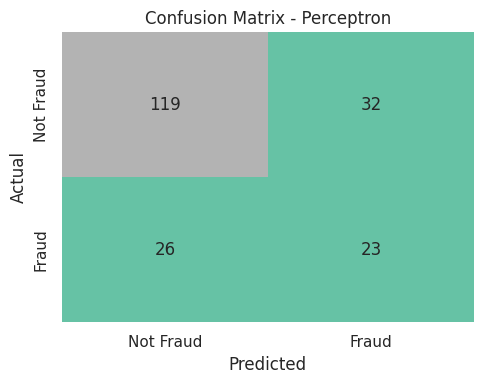

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


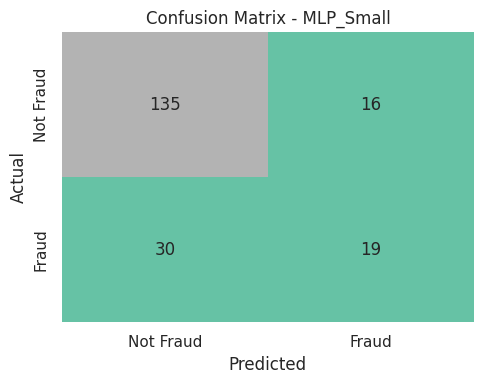

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


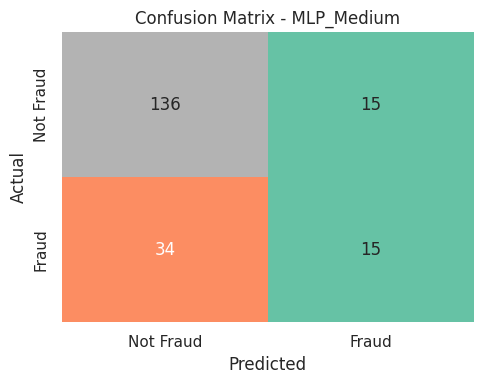

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


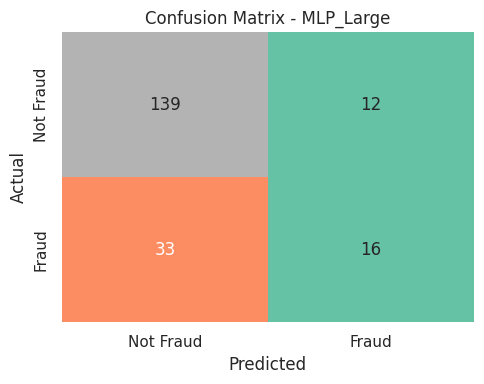

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


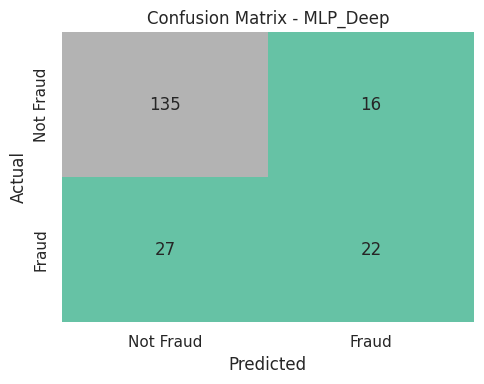

In [169]:
# Loop through the saved neural network models
for name in modelos_nn.keys():
    model_path = f"saved_models_nn/{name}.keras"
    
    # Check if the model file exists before loading
    if not os.path.exists(model_path):
        print(f"Model not found: {model_path}")
        continue

    # Load the trained model
    loaded_model = tf.keras.models.load_model(model_path)

    # Make prediction on test set
    y_proba = loaded_model.predict(X_test)
    y_pred = (y_proba >= 0.5).astype(int).ravel()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot using seaborn
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Set2", cbar=False,
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


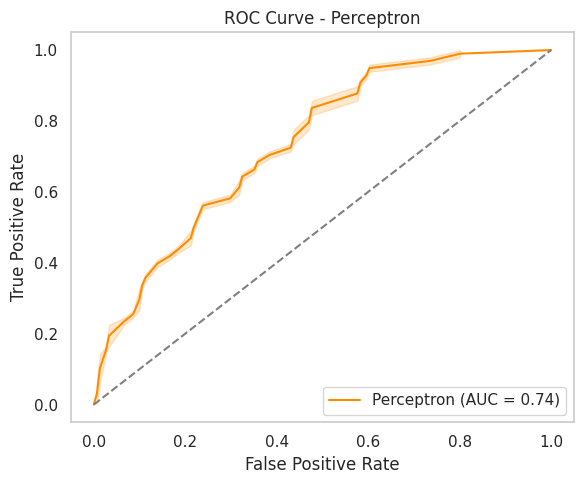

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


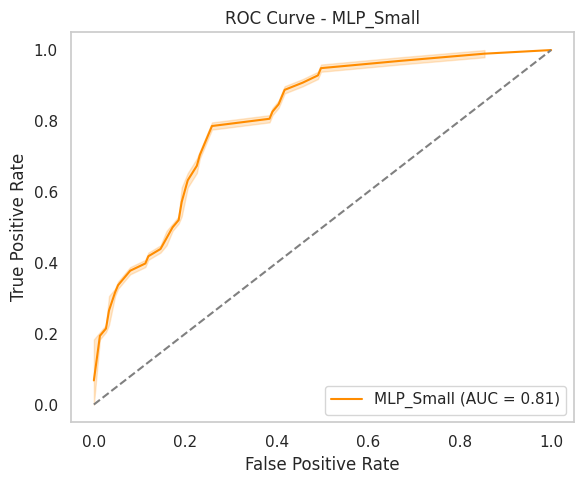

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


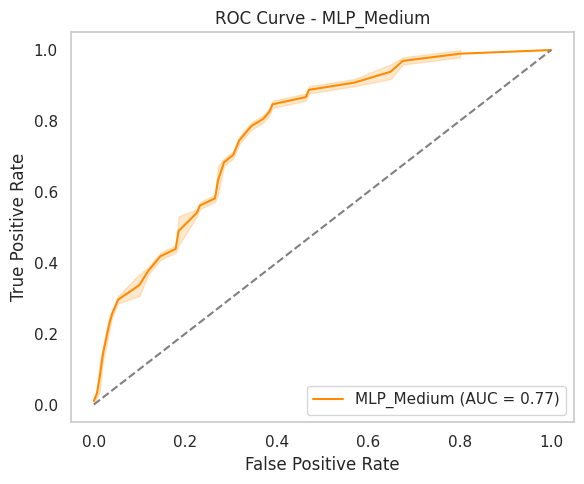

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


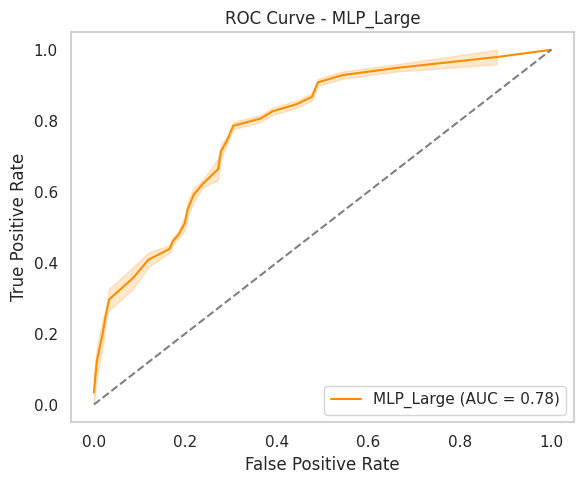

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


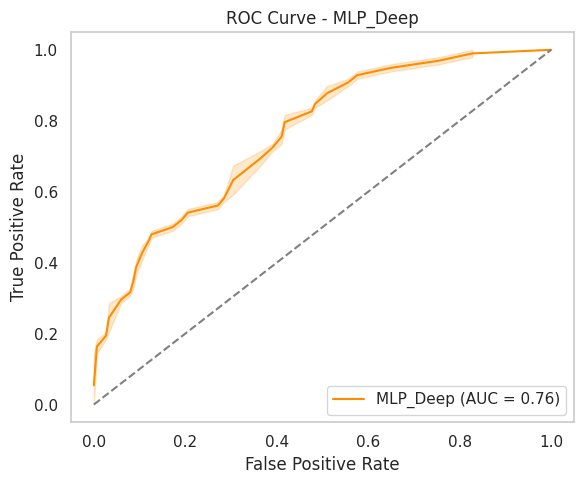

In [170]:
# Set seaborn style
sns.set(style="whitegrid")

# Loop through each saved neural network model
for name in modelos_nn.keys():
    model_path = f"saved_models_nn/{name}.keras"

    # Check if the model exists
    if not os.path.exists(model_path):
        print(f"Model not found: {model_path}")
        continue

    # Load the model
    loaded_model = tf.keras.models.load_model(model_path)

    # Make probability predictions
    y_proba = loaded_model.predict(X_test).ravel()

    # Calculate FPR, TPR and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(6, 5))
    sns.lineplot(x=fpr, y=tpr, label=f"{name} (AUC = {roc_auc:.2f})", color="darkorange")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [171]:
results_nn = []

# Loop through saved neural network models
for name in modelos_nn.keys():
    model_path = f"saved_models_nn/{name}.keras"

    if not os.path.exists(model_path):
        print(f"Model not found: {model_path}")
        continue

    model = tf.keras.models.load_model(model_path)

    # Predict probabilities and binarize using threshold = 0.5
    y_pred_proba = model.predict(X_test).ravel()
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Store results
    results_nn.append({
        "Model": name,
        "Accuracy": acc,
        "F1-score": f1,
        "Recall": recall,
        "Precision": precision
    })

# Convert to DataFrame
df_results_nn = pd.DataFrame(results_nn)

# Function to highlight the best value in each metric column
def highlight_max(s):
    return ['background-color: green' if v == s.max() else '' for v in s]

# Display with highlights for best models
display(df_results_nn.style.apply(highlight_max, subset=["Accuracy", "F1-score", "Recall", "Precision"]))

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


,Model,Accuracy,F1-score,Recall,Precision
0,Perceptron,0.710000,0.442308,0.469388,0.418182
1,MLP_Small,0.770000,0.452381,0.387755,0.542857
2,MLP_Medium,0.755000,0.379747,0.306122,0.500000
3,MLP_Large,0.775000,0.415584,0.326531,0.571429
4,MLP_Deep,0.785000,0.505747,0.448980,0.578947


# Part 14 - Conclusion

### ✅ **Conclusão – Modelos de Redes Neurais**

🔍 **Português:**

Neste estudo, cinco arquiteturas de redes neurais foram avaliadas para detecção de fraudes em sinistros de seguro, variando desde um **Perceptron simples** até uma **MLP profunda com múltiplas camadas ocultas e dropout**.

**Principais insights:**

* O modelo **MLP\_Profundo** obteve os melhores resultados em termos de **acurácia**, **F1-score** e **recall**, mostrando maior capacidade de capturar padrões complexos relacionados a fraudes.
* O modelo **Perceptron** apresentou desempenho inferior, indicando que arquiteturas muito simples não são suficientes para representar adequadamente o problema.
* O uso de **Dropout** e **camadas intermediárias** nas MLPs médias e grandes contribuiu para melhor desempenho geral e menor overfitting.
* A normalização dos dados com `StandardScaler` foi essencial para o bom funcionamento das redes neurais.
* Todas as redes foram salvas no formato `.keras` e avaliadas com **matriz de confusão**, **curva ROC**, **AUC** e **métricas clássicas** (precisão, recall, F1).

🧠 De maneira geral, redes mais profundas com regularização mostraram melhor desempenho, embora ainda fiquem um pouco atrás de modelos como **XGBoost** e **LightGBM** neste tipo de dado tabular. Há espaço para melhoria com técnicas como `class_weight`, `focal loss`, `SMOTE` ou redes híbridas com embeddings categóricos.


🌐 **English:**

In this study, five neural network architectures were evaluated for fraud detection in insurance claims, ranging from a **simple Perceptron** to a **deep MLP with multiple hidden layers and dropout**.

**Key insights:**

* The **MLP\_Profundo (Deep MLP)** model achieved the best results in terms of **accuracy**, **F1-score**, and **recall**, demonstrating greater ability to capture complex fraud-related patterns.
* The **Perceptron** model underperformed, indicating that overly simple architectures are insufficient for this problem.
* The use of **dropout** and **intermediate layers** in medium and large MLPs helped reduce overfitting and improve generalization.
* Data normalization with `StandardScaler` was critical for proper neural network training.
* All models were saved in `.keras` format and evaluated using **confusion matrices**, **ROC curves**, **AUC**, and standard metrics (precision, recall, F1).

Overall, deeper networks with regularization outperformed simpler ones, although they still slightly lag behind traditional models like **XGBoost** and **LightGBM** in this tabular scenario. Further improvements could come from `class_weight`, `focal loss`, `SMOTE`, or hybrid models using categorical embeddings.